In [14]:
import staintools
import csv
import os
import glob
import re
from pandas import DataFrame, Series
from PIL import Image
import timeit
import time
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_paths = ["../data_segments/data_balanced_duplicate_sample/train/EE/"]

In [3]:
# get images
images = {}
images_by_folder = {}
for train_path in train_paths:
    images_by_folder[str(train_path)] = []
    files = glob.glob(os.path.join(train_path, '*.jpg'))
    for fl in files:
        flbase = os.path.basename(fl)
        flbase_noext = os.path.splitext(flbase)[0]
        images[flbase_noext]=fl
        images_by_folder[str(train_path)].append(flbase_noext)

In [4]:
# initialize stain and brightness normalizer
stain_normalizer = staintools.StainNormalizer(method='vahadane')
standardizer = staintools.BrightnessStandardizer()

In [5]:
# choose target image
target_image = staintools.read_image("../data_segments/data_balanced_duplicate_sample/valid/Celiac/C06-27_01_1000_2000_0.jpg")
standard_target_image = standardizer.transform(target_image)
stain_normalizer.fit(standard_target_image)

In [6]:
# get destination path
path_change_map = {}

for key in list(images_by_folder.keys()):
    temp = key.replace('..', '/scratch/as3ek')
    path_change_map[key] = temp

3637 130370_6722_001_6900_11700_0
3638 130379_6731_002_4773_2442_0
3639 130369_6721_001_8250_12625_0
3640 22_3750_1500_0
3641 130378_6730_002_1998_6327_0
3642 50_5312_7304_0
3643 130373_6725_001_3774_1554_0
3644 87_600_5000_0
3645 84_3652_5312_0
3646 130365_6716_001_2775_4551_0
3647 130373_6725_001_3500_1800_0
3648 130373_6725_002_3976_1136_0
3649 130369_6721_001_5500_11700_0
3650 130369_6721_001_5112_11360_0
3651 59_3200_4000_0
3652 130373_6725_001_3375_2125_0
3653 130379_6731_002_1200_3100_0
3654 35_6806_3652_0
3655 130369_6721_001_5106_12432_0
3656 130369_6721_001_2500_2750_0
3657 130379_6731_002_2490_6142_0
3658 84_5312_1992_0
3659 73_4648_4648_0
3660 130369_6721_001_5625_12625_0
3661 35_6000_5400_0
3662 130378_6730_002_1400_3500_0
3663 130376_6728_001_1500_500_0
3664 130369_6721_001_8000_10100_0
3665 130373_6725_001_2272_2982_0
3666 130373_6725_001_1625_3750_0
3667 130370_6722_001_300_11800_0
3668 130382_6718_001_1625_3875_0
3669 130379_6731_002_2220_4884_0


/home/as3ek/.local/lib/python3.6/site-packages/staintools/utils/misc_utils.py:56: RuntimeWarning: invalid value encountered in true_divide
  return A / np.linalg.norm(A, axis=1)[:, None]
/home/as3ek/.local/lib/python3.6/site-packages/staintools/stain_normalizer.py:42: RuntimeWarning: divide by zero encountered in true_divide
  source_concentrations *= (self.maxC_target / maxC_source)
/home/as3ek/.local/lib/python3.6/site-packages/staintools/stain_normalizer.py:42: RuntimeWarning: invalid value encountered in multiply
  source_concentrations *= (self.maxC_target / maxC_source)


3670 130378_6730_002_1500_5100_0
3671 84_1250_2500_0
3672 50_1992_3984_0
3673 130379_6731_001_1000_5625_0
3674 130370_6722_001_3124_14058_0
3675 59_3250_4000_0
3676 29_1800_200_0
3677 130365_6716_001_2300_3400_0
3678 84_4482_1328_0
3679 85_2988_2490_0
3680 35_2158_5312_0
3681 29_4316_2158_0
3682 29_1494_1826_0
3683 130380_6726_001_1992_498_0
3684 130369_6721_001_1000_17700_0
3685 130370_6722_001_7125_13000_0
3686 59_8000_2000_0
3687 58_7992_3330_0
3688 130378_6730_002_750_7250_0
3689 130380_6726_001_1800_400_0
3690 130370_6722_001_3692_12922_0
3691 130379_6731_001_2700_3900_0
3692 111_5810_4980_0
3693 130373_6725_002_400_3600_0
3694 130373_6725_001_2331_3552_0
3695 42_4200_4600_0
3696 130369_6721_001_9750_10500_0
3697 130369_6721_001_1500_2875_0
3698 79_5800_5200_0
3699 108_2400_3200_0
3700 42_5328_3996_0
3701 84_6660_1998_0
3702 130373_6725_001_2822_1494_0
3703 59_4400_200_0
3704 130380_6726_001_1420_852_0
3705 130378_6730_001_2158_3652_0
3706 22_1400_1600_0
3707 50_5750_2000_0
3708 1

3980 130379_6731_002_2300_5000_0
3981 130372_6724_001_3625_1500_0
3982 130372_6724_001_2900_1400_0
3983 58_4400_1600_0
3984 130370_6722_001_7000_11700_0
3985 59_6660_3996_0
3986 130376_6728_001_2982_710_0
3987 111_1500_4000_0
3988 85_4648_6308_0
3989 29_5328_4995_0
3990 77_2158_4482_0
3991 130379_6731_002_2200_5100_0
3992 87_2988_6308_0
3993 130372_6724_001_3124_6390_0
3994 77_3663_5661_0
3995 130379_6731_002_3500_3200_0
3996 130370_6722_001_4875_13250_0
3997 58_6308_4316_0
3998 85_4482_6806_0
3999 130378_6730_001_994_5822_0
4000 59_1000_1800_0
4001 59_4980_2158_0
4002 87_3600_7600_0
4003 130370_6722_001_666_10545_0
4004 108_3330_4995_0
4005 130369_6721_001_4500_15100_0
4006 130369_6721_001_8250_11000_0
4007 108_8000_8600_0
4008 130378_6730_002_2000_6800_0
4009 79_4482_5810_0
4010 130370_6722_001_1665_10878_0
4011 84_2997_1665_0
4012 130372_6724_001_2250_5875_0
4013 84_664_3984_0
4014 130377_6729_001_5822_710_0
4015 108_7992_8991_0
4016 130376_6728_001_2875_1250_0
4017 85_3000_8500_0
4

4290 22_2158_1826_0
4291 29_3000_1500_0
4292 22_999_4329_0
4293 59_8400_2000_0
4294 23_6200_2600_0
4295 130377_6729_001_5100_1600_0
4296 130372_6724_001_888_12321_0
4297 130378_6730_002_1562_4544_0
4298 130377_6729_001_5400_2600_0
4299 35_5250_1000_0
4300 22_1600_3400_0
4301 130373_6725_001_1875_3625_0
4302 111_3486_5146_0
4303 130370_6722_001_3885_13098_0
4304 130369_6721_001_5810_14442_0
4305 50_400_6800_0
4306 130369_6721_001_5106_444_0
4307 130373_6725_002_3250_1000_0
4308 130382_6718_001_852_2414_0
4309 130379_6731_002_800_5400_0
4310 35_3486_4814_0
4311 79_3400_7600_0
4312 130369_6721_001_1554_2997_0
4313 108_9500_7500_0
4314 130378_6730_002_1400_4800_0
4315 130379_6731_001_5125_3375_0
4316 130379_6731_001_6800_1700_0
4317 23_14400_4000_0
4318 35_4750_2250_0
4319 130379_6731_001_3600_3900_0
4320 130380_6726_001_3550_1136_0
4321 130369_6721_001_498_3818_0
4322 120_4000_9250_0
4323 108_1332_3663_0
4324 130377_6729_001_4750_3500_0
4325 130369_6721_001_8520_13916_0
4326 50_3996_4662_

4590 11_5600_6000_0
4591 130378_6730_001_1420_2414_0
4592 77_2750_3250_0
4593 108_6308_2490_0
4594 79_3154_1992_0
4595 130377_6729_001_4375_2875_0
4596 23_2158_7304_0
4597 111_2500_6500_0
4598 120_7470_5810_0
4599 130380_6726_001_3154_1660_0
4600 130370_6722_001_2500_13600_0
4601 23_3320_1826_0
4602 130382_6718_001_1887_1887_0
4603 130377_6729_001_800_5800_0
4604 23_5994_4662_0
4605 11_3600_2800_0
4606 108_7000_8800_0
4607 120_3486_9462_0
4608 130382_6718_001_1400_2300_0
4609 79_1600_2800_0
4610 59_1800_1800_0
4611 130379_6731_001_3320_4814_0
4612 85_5600_4000_0
4613 130379_6731_001_5112_1562_0
4614 130378_6730_002_2200_2800_0
4615 77_0_1494_0
4616 130382_6718_001_1375_4750_0
4617 59_3330_2997_0
4618 130379_6731_001_3663_3441_0
4619 35_3400_3000_0
4620 130372_6724_001_3000_2600_0
4621 130369_6721_001_12375_10250_0
4622 35_3984_6142_0
4623 130370_6722_001_5478_13944_0
4624 130369_6721_001_8250_11750_0
4625 59_7636_4316_0
4626 77_1000_4750_0
4627 130365_6716_001_3330_4884_0
4628 130378_6

4893 130373_6725_002_3100_3000_0
4894 120_5000_7600_0
4895 77_5644_3154_0
4896 130378_6730_001_1162_5312_0
4897 130372_6724_001_1776_9879_0
4898 130370_6722_001_6375_13250_0
4899 77_2324_6806_0
4900 50_4800_3600_0
4901 50_5328_2331_0
4902 77_5750_1000_0
4903 130369_6721_001_9250_9000_0
4904 23_4814_4150_0
4905 130370_6722_001_9794_2158_0
4906 77_0_1800_0
4907 130373_6725_001_2200_2200_0
4908 108_5400_3800_0
4909 130370_6722_001_8300_12200_0
4910 130369_6721_001_10900_10100_0
4911 130369_6721_001_2125_2750_0
4912 79_6806_4482_0
4913 79_2656_5810_0
4914 130380_6726_001_2625_1250_0
4915 130379_6731_001_1750_2500_0
4916 130370_6722_001_7500_13100_0
4917 130377_6729_001_4600_2300_0
4918 29_2988_332_0
4919 50_4500_2250_0
4920 73_6750_6250_0
4921 85_7470_2490_0
4922 120_3000_5600_0
4923 130369_6721_001_9600_10900_0
4924 130365_6716_001_1900_3600_0
4925 130370_6722_001_10212_2220_0
4926 130376_6728_001_6327_444_0
4927 130379_6731_002_6105_2220_0
4928 130379_6731_002_1846_5254_0
4929 50_3652_69

5199 130378_6730_001_1110_1110_0
5200 130369_6721_001_6900_10800_0
5201 111_2000_600_0
5202 130377_6729_001_2000_5900_0
5203 23_6640_5478_0
5204 130379_6731_002_6660_1665_0
5205 23_999_8658_0
5206 130378_6730_001_1562_4828_0
5207 23_8300_4316_0
5208 23_10790_9296_0
5209 130379_6731_001_1600_5200_0
5210 130370_6722_001_9375_12875_0
5211 130377_6729_001_4200_3600_0
5212 120_6640_4150_0
5213 130378_6730_002_1125_6750_0
5214 130372_6724_001_2000_6100_0
5215 130370_6722_001_2775_13542_0
5216 130365_6716_001_2500_3250_0
5217 108_2250_7500_0
5218 108_5312_2822_0
5219 87_3154_6308_0
5220 111_1660_4648_0
5221 130370_6722_001_996_11620_0
5222 130379_6731_001_2100_3300_0
5223 130378_6730_001_2300_2600_0
5224 130370_6722_001_500_11800_0
5225 130370_6722_001_568_10934_0
5226 130373_6725_001_3700_1200_0
5227 130372_6724_001_2442_5772_0
5228 130378_6730_001_666_444_0
5229 130377_6729_001_1625_5500_0
5230 130378_6730_001_444_2331_0
5231 23_5328_10989_0
5232 59_4150_664_0
5233 130379_6731_001_6438_1332

5495 130370_6722_001_11211_3663_0
5496 87_2997_3663_0
5497 130379_6731_001_6640_1328_0
5498 130370_6722_001_13064_4118_0
5499 111_3800_4400_0
5500 130379_6731_002_2664_4884_0
5501 130377_6729_001_4600_3400_0
5502 130381_6723_001_125_375_0
5503 130372_6724_001_1875_9750_0
5504 130382_6718_001_1998_1110_0
5505 130372_6724_001_2886_3108_0
5506 85_6308_3486_0
5507 84_1000_4200_0
5508 42_4000_4800_0
5509 50_2200_7400_0
5510 130378_6730_002_2000_2600_0
5511 77_5000_1500_0
5512 130365_6716_001_2109_4884_0
5513 130376_6728_001_6660_777_0
5514 50_4600_6600_0
5515 130369_6721_001_7770_13986_0
5516 130377_6729_001_1110_5439_0
5517 130365_6716_001_3663_5217_0
5518 22_5644_1826_0
5519 130373_6725_002_710_3550_0
5520 79_7000_2800_0
5521 79_5146_7636_0
5522 130369_6721_001_4884_11877_0
5523 79_2800_4800_0
5524 130379_6731_001_5700_1100_0
5525 108_1000_5600_0
5526 59_4814_830_0
5527 111_2656_7138_0
5528 130365_6716_001_1328_2656_0
5529 77_3250_7000_0
5530 84_3652_1992_0
5531 22_2500_1500_0
5532 130379

5799 50_6474_2490_0
5800 130379_6731_001_2200_3300_0
5801 77_8300_8466_0
5802 79_1400_2600_0
5803 130373_6725_001_5300_1100_0
5804 130370_6722_001_11786_3320_0
5805 130370_6722_001_1700_12800_0
5806 108_8600_8600_0
5807 50_3200_7400_0
5808 130376_6728_001_5810_830_0
5809 130369_6721_001_1300_2700_0
5810 130373_6725_002_3552_1221_0
5811 130377_6729_001_5000_750_0
5812 130380_6726_001_2886_999_0
5813 35_2656_4814_0
5814 50_3750_5500_0
5815 79_2664_2664_0
5816 130378_6730_002_710_6674_0
5817 130379_6731_001_2500_5875_0
5818 130370_6722_001_11700_2000_0
5819 130379_6731_002_3663_3663_0
5820 130380_6726_001_2664_222_0
5821 50_4400_3600_0
5822 58_6142_4980_0
5823 120_1750_6250_0
5824 35_2997_5328_0
5825 130378_6730_001_1000_5300_0
5826 23_9750_9250_0
5827 130382_6718_001_1554_4329_0
5828 130378_6730_002_1665_4107_0
5829 130379_6731_002_3320_1328_0
5830 130381_6723_001_800_400_0
5831 130380_6726_001_1221_888_0
5832 130370_6722_001_6771_11877_0
5833 111_830_2656_0
5834 130378_6730_001_2600_580

6106 130365_6716_001_888_3108_0
6107 79_5200_5200_0
6108 85_4150_830_0
6109 23_13944_1992_0
6110 77_7636_7802_0
6111 79_6750_3000_0
6112 108_1200_6200_0
6113 58_8134_2490_0
6114 130372_6724_001_3996_777_0
6115 23_8658_4662_0
6116 130370_6722_001_10545_2553_0
6117 120_4329_8991_0
6118 22_5400_4200_0
6119 130378_6730_002_1600_1100_0
6120 130378_6730_002_444_111_0
6121 22_3652_2158_0
6122 111_4000_1500_0
6123 130380_6726_001_3100_1700_0
6124 130380_6726_001_4375_1500_0
6125 79_800_2800_0
6126 120_11000_5800_0
6127 130372_6724_001_4500_9100_0
6128 130376_6728_001_4125_1250_0
6129 130379_6731_002_6300_2300_0
6130 130378_6730_002_333_1443_0
6131 59_6640_2988_0
6132 130377_6729_001_1900_4400_0
6133 130369_6721_001_11200_9100_0
6134 23_6000_9250_0
6135 130370_6722_001_6771_12654_0
6136 79_7250_3500_0
6137 77_6142_8964_0
6138 130369_6721_001_4500_900_0
6139 87_3486_6806_0
6140 50_3818_1162_0
6141 120_10800_3800_0
6142 42_1660_1826_0
6143 130379_6731_002_994_5822_0
6144 23_12400_3800_0
6145 111_

6413 130378_6730_001_2553_3552_0
6414 120_6200_3600_0
6415 79_4600_2800_0
6416 130373_6725_001_2158_2988_0
6417 130382_6718_001_1125_2500_0
6418 130378_6730_001_750_8000_0
6419 130373_6725_001_4400_1800_0
6420 130373_6725_001_4884_999_0
6421 130377_6729_001_2490_4814_0
6422 73_4648_2656_0
6423 111_800_1600_0
6424 130380_6726_001_1500_625_0
6425 130382_6718_001_875_4000_0
6426 130369_6721_001_6375_11250_0
6427 130369_6721_001_1887_2664_0
6428 120_996_6474_0
6429 130373_6725_002_2414_3266_0
6430 130369_6721_001_3000_14500_0
6431 130369_6721_001_7326_14763_0
6432 130370_6722_001_11125_2375_0
6433 79_999_3663_0
6434 85_7200_3200_0
6435 130378_6730_001_1375_4125_0
6436 51_3330_1332_0
6437 130365_6716_001_1278_3834_0
6438 130372_6724_001_3500_5200_0
6439 130379_6731_002_3774_2886_0
6440 50_7304_2158_0
6441 130372_6724_001_4375_8000_0
6442 130379_6731_001_1998_2997_0
6443 77_6474_2158_0
6444 77_2490_830_0
6445 130370_6722_001_10434_3663_0
6446 77_5478_8466_0
6447 130369_6721_001_1875_2625_0
6

6718 130369_6721_001_3625_15625_0
6719 130378_6730_001_1100_700_0
6720 23_14110_4648_0
6721 130378_6730_001_1500_7875_0
6722 42_3800_5400_0
6723 120_8000_5500_0
6724 108_5750_8750_0
6725 77_4316_8300_0
6726 42_3663_4662_0
6727 23_6308_4980_0
6728 130378_6730_002_1776_7104_0
6729 73_3500_8750_0
6730 130369_6721_001_5500_14600_0
6731 22_1665_1332_0
6732 108_7802_6474_0
6733 130382_6718_001_2900_1600_0
6734 77_6600_9000_0
6735 50_3000_5250_0
6736 130376_6728_001_4482_830_0
6737 35_2656_3984_0
6738 130377_6729_001_3700_3600_0
6739 130372_6724_001_1332_10101_0
6740 77_4400_6000_0
6741 130379_6731_001_2664_1998_0
6742 23_3000_8750_0
6743 23_3800_1800_0
6744 84_3320_5810_0
6745 42_5250_3250_0
6746 130369_6721_001_3500_14600_0
6747 85_7138_1328_0
6748 130377_6729_001_2109_5772_0
6749 111_1826_498_0
6750 130379_6731_001_4700_2900_0
6751 73_2324_8466_0
6752 108_5750_8000_0
6753 130372_6724_001_3552_3108_0
6754 79_830_4814_0
6755 130370_6722_001_6400_12900_0
6756 130369_6721_001_9130_8964_0
6757 

7020 58_6500_4250_0
7021 73_2324_7968_0
7022 23_1665_6993_0
7023 130369_6721_001_2700_16400_0
7024 130369_6721_001_7625_14125_0
7025 50_3154_2988_0
7026 130370_6722_001_3200_13800_0
7027 108_5328_2664_0
7028 130369_6721_001_1443_2331_0
7029 130373_6725_002_1443_3108_0
7030 85_5994_6327_0
7031 22_5500_4000_0
7032 130378_6730_002_2250_7250_0
7033 111_600_1600_0
7034 23_5250_11500_0
7035 120_9000_5800_0
7036 130372_6724_001_4150_9296_0
7037 35_4316_5146_0
7038 23_5400_3400_0
7039 130373_6725_002_1300_3100_0
7040 130382_6718_001_994_2556_0
7041 111_3984_7636_0
7042 108_6000_2800_0
7043 50_600_6400_0
7044 120_11750_2250_0
7045 130370_6722_001_7700_13400_0
7046 85_6142_2158_0
7047 130378_6730_002_1420_852_0
7048 130370_6722_001_9435_1998_0
7049 130378_6730_001_1125_5125_0
7050 11_3154_5810_0
7051 130379_6731_001_1998_5550_0
7052 73_6806_2324_0
7053 130378_6730_001_1800_7700_0
7054 59_5200_1400_0
7055 23_4482_7304_0
7056 130378_6730_002_1562_2130_0
7057 130369_6721_001_5976_14442_0
7058 13036

7326 130379_6731_001_2300_6000_0
7327 120_6800_8600_0
7328 35_4316_2324_0
7329 130369_6721_001_11500_9900_0
7330 130379_6731_002_300_6600_0
7331 111_830_5810_0
7332 130369_6721_001_4900_15800_0
7333 120_5644_9130_0
7334 23_14000_3600_0
7335 130369_6721_001_2800_2200_0
7336 85_7400_2800_0
7337 130372_6724_001_1700_11400_0
7338 130365_6716_001_1665_3774_0
7339 130379_6731_002_426_5822_0
7340 130378_6730_002_994_1562_0
7341 130365_6716_001_2125_250_0
7342 130365_6716_001_2000_800_0
7343 130379_6731_001_1125_3250_0
7344 22_2822_7470_0
7345 51_3250_1250_0
7346 77_1328_1494_0
7347 51_5400_2600_0
7348 130379_6731_001_2664_4440_0
7349 73_4648_3984_0
7350 73_2656_4648_0
7351 130376_6728_001_2100_0_0
7352 130378_6730_002_2331_7548_0
7353 87_5810_3652_0
7354 130369_6721_001_1328_17430_0
7355 130369_6721_001_1554_16983_0
7356 130376_6728_001_5700_400_0
7357 120_14000_2600_0
7358 73_6142_2656_0
7359 23_9200_9000_0
7360 120_8400_3000_0
7361 130369_6721_001_8436_9435_0
7362 23_9628_3320_0
7363 130378

7626 130378_6730_001_666_6438_0
7627 130379_6731_002_2250_2625_0
7628 130373_6725_001_4600_1400_0
7629 59_1328_1494_0
7630 130372_6724_001_2331_5550_0
7631 130373_6725_002_700_3400_0
7632 130379_6731_002_6900_1300_0
7633 29_4800_5000_0
7634 108_7600_9400_0
7635 130379_6731_001_6327_2109_0
7636 130379_6731_001_3100_3200_0
7637 130369_6721_001_4600_15900_0
7638 73_4150_8632_0
7639 130369_6721_001_10458_10458_0
7640 120_4150_7138_0
7641 130377_6729_001_800_6600_0
7642 130380_6726_001_2200_500_0
7643 85_6806_1992_0
7644 130369_6721_001_9324_9213_0
7645 11_1200_3600_0
7646 11_996_1660_0
7647 120_10790_4316_0
7648 130379_6731_001_2158_5312_0
7649 120_8466_2988_0
7650 130369_6721_001_375_3875_0
7651 130373_6725_001_2300_2700_0
7652 79_996_3818_0
7653 130376_6728_001_6500_200_0
7654 50_4648_6640_0
7655 130369_6721_001_5625_15000_0
7656 73_3486_8632_0
7657 85_2750_4750_0
7658 108_5400_6400_0
7659 23_9600_8000_0
7660 130377_6729_001_1000_6400_0
7661 87_1826_2822_0
7662 23_3984_3818_0
7663 23_159

7936 130379_6731_001_3600_5100_0
7937 130372_6724_001_1400_9000_0
7938 79_3984_7636_0
7939 130378_6730_001_400_2000_0
7940 130378_6730_002_1300_5800_0
7941 130379_6731_002_2750_3375_0
7942 130378_6730_001_2700_6200_0
7943 130369_6721_001_4300_500_0
7944 130369_6721_001_11125_10875_0
7945 130379_6731_001_0_6327_0
7946 130378_6730_001_2200_7500_0
7947 130379_6731_001_1998_4662_0
7948 11_1992_4648_0
7949 111_4648_1328_0
7950 108_3486_5478_0
7951 29_1800_3000_0
7952 130373_6725_002_1554_3552_0
7953 85_3600_1600_0
7954 87_3250_2500_0
7955 130377_6729_001_5217_3330_0
7956 130376_6728_001_5000_600_0
7957 130377_6729_001_2324_4814_0
7958 130370_6722_001_8214_12765_0
7959 130369_6721_001_3984_13612_0
7960 130370_6722_001_5810_13446_0
7961 130378_6730_001_2331_6660_0
7962 130369_6721_001_4884_555_0
7963 51_2500_3250_0
7964 51_2800_4200_0
7965 130370_6722_001_9250_12750_0
7966 130370_6722_001_3000_12125_0
7967 111_2822_8632_0
7968 130370_6722_001_10900_2100_0
7969 77_7600_8000_0
7970 130378_6730_

8233 130378_6730_001_2556_6248_0
8234 130373_6725_002_1660_2822_0
8235 59_3400_1600_0
8236 11_3652_4648_0
8237 87_4000_3500_0
8238 130373_6725_002_1750_3375_0
8239 130379_6731_002_1500_2900_0
8240 130365_6716_001_3266_5112_0
8241 130377_6729_001_6105_1221_0
8242 130382_6718_001_852_3266_0
8243 77_6600_6400_0
8244 59_1665_1998_0
8245 130373_6725_002_852_4118_0
8246 130378_6730_001_2100_7600_0
8247 108_2158_6142_0
8248 130379_6731_002_1988_2840_0
8249 73_2500_5000_0
8250 130373_6725_001_2664_3885_0
8251 130373_6725_002_3750_1500_0
8252 77_7000_3600_0
8253 130370_6722_001_5125_13125_0
8254 130379_6731_002_6390_710_0
8255 111_1998_2664_0
8256 130379_6731_001_5800_1600_0
8257 130377_6729_001_5396_2556_0
8258 130373_6725_002_2698_1846_0
8259 120_10800_2600_0
8260 84_1162_2988_0
8261 130380_6726_001_125_500_0
8262 73_3818_7802_0
8263 130369_6721_001_1500_2400_0
8264 58_5000_4400_0
8265 23_5800_1200_0
8266 130378_6730_001_250_1375_0
8267 130370_6722_001_1125_11500_0
8268 130369_6721_001_8100_9

8537 130379_6731_002_6500_1900_0
8538 23_12450_2822_0
8539 130370_6722_001_142_11644_0
8540 130378_6730_001_111_999_0
8541 130369_6721_001_5000_12200_0
8542 130379_6731_001_1000_7400_0
8543 130377_6729_001_1750_5375_0
8544 22_4600_2400_0
8545 120_2158_7304_0
8546 130382_6718_001_1200_2400_0
8547 130370_6722_001_13375_3625_0
8548 130369_6721_001_5994_11655_0
8549 130369_6721_001_3400_14000_0
8550 130373_6725_002_3250_2750_0
8551 130378_6730_001_1800_5800_0
8552 87_1328_5478_0
8553 58_5810_4316_0
8554 58_3486_1660_0
8555 111_2750_6250_0
8556 130369_6721_001_8300_11288_0
8557 79_2600_7800_0
8558 130369_6721_001_8875_12875_0
8559 23_14800_2600_0
8560 130365_6716_001_2100_3800_0
8561 130369_6721_001_11125_9625_0
8562 120_6800_5000_0
8563 130370_6722_001_12125_2500_0
8564 85_8134_4648_0
8565 77_3818_5976_0
8566 23_8000_4750_0
8567 130373_6725_002_3124_2840_0
8568 77_7000_8000_0
8569 130369_6721_001_6216_14985_0
8570 51_2331_2331_0
8571 77_4000_7400_0
8572 130376_6728_001_2556_426_0
8573 1303

8839 130369_6721_001_5500_11500_0
8840 130378_6730_001_1250_5375_0
8841 130365_6716_001_2250_1500_0
8842 130379_6731_001_4000_4100_0
8843 22_5976_5146_0
8844 130379_6731_001_2900_5500_0
8845 29_600_3000_0
8846 130380_6726_001_4440_999_0
8847 73_3800_2200_0
8848 130379_6731_001_555_5661_0
8849 23_15000_2800_0
8850 73_7200_4800_0
8851 111_3000_800_0
8852 35_1328_5312_0
8853 130372_6724_001_2600_1900_0
8854 130372_6724_001_1000_11250_0
8855 111_664_6972_0
8856 130369_6721_001_7500_13500_0
8857 130369_6721_001_7900_10900_0
8858 130377_6729_001_5375_500_0
8859 130379_6731_001_3486_5478_0
8860 23_498_9296_0
8861 23_5000_11200_0
8862 130369_6721_001_7437_14541_0
8863 11_6000_5750_0
8864 58_332_1826_0
8865 130376_6728_001_4828_1562_0
8866 130365_6716_001_1375_1250_0
8867 130372_6724_001_4000_9300_0
8868 130372_6724_001_710_11360_0
8869 79_6600_6200_0
8870 130369_6721_001_7470_10624_0
8871 130379_6731_002_4100_2900_0
8872 130378_6730_001_2331_6327_0
8873 108_2324_5146_0
8874 130379_6731_001_632

9138 130372_6724_001_1998_5217_0
9139 130369_6721_001_800_18600_0
9140 130370_6722_001_2553_13098_0
9141 85_2490_4482_0
9142 130378_6730_002_830_7304_0
9143 130378_6730_002_1200_2700_0
9144 130369_6721_001_9628_11952_0
9145 84_4482_0_0
9146 130379_6731_001_1665_4440_0
9147 73_7200_3400_0
9148 108_3800_7200_0
9149 130369_6721_001_8900_9200_0
9150 130379_6731_001_5478_1328_0
9151 130378_6730_001_1494_4150_0
9152 130373_6725_002_3700_2800_0
9153 130369_6721_001_8300_9130_0
9154 108_5661_9657_0
9155 130379_6731_001_5112_3266_0
9156 42_3800_1400_0
9157 23_6400_9600_0
9158 130370_6722_001_6375_11750_0
9159 120_11500_6000_0
9160 130378_6730_001_1100_1700_0
9161 130379_6731_002_2375_3750_0
9162 130378_6730_001_800_2300_0
9163 50_4500_3000_0
9164 130372_6724_001_5500_3800_0
9165 130373_6725_001_4773_1665_0
9166 79_8200_5000_0
9167 11_2656_1162_0
9168 130379_6731_002_5625_2750_0
9169 22_3320_4648_0
9170 130376_6728_001_2109_999_0
9171 84_5328_4662_0
9172 130369_6721_001_9100_8900_0
9173 22_2800_

9433 130370_6722_001_2775_11211_0
9434 130369_6721_001_5800_11700_0
9435 130369_6721_001_2500_2125_0
9436 130376_6728_001_3200_1700_0
9437 130370_6722_001_8900_13200_0
9438 23_14276_1328_0
9439 23_7470_4648_0
9440 130369_6721_001_7500_14100_0
9441 130373_6725_001_2130_2130_0
9442 50_4200_8200_0
9443 23_10250_7250_0
9444 130379_6731_002_4218_3552_0
9445 130372_6724_001_4100_700_0
9446 35_1660_4482_0
9447 130370_6722_001_8378_12070_0
9448 130379_6731_002_2625_3375_0
9449 23_6400_11400_0
9450 130369_6721_001_8991_12210_0
9451 79_2200_7400_0
9452 130373_6725_002_2490_3818_0
9453 73_5146_4814_0
9454 22_6142_6142_0
9455 130379_6731_002_5375_3000_0
9456 130370_6722_001_8500_12625_0
9457 130370_6722_001_11288_2158_0
9458 130379_6731_002_5822_2414_0
9459 73_7326_4329_0
9460 35_6400_4200_0
9461 130373_6725_002_1875_3375_0
9462 73_500_7500_0
9463 130378_6730_001_1887_5994_0
9464 130369_6721_001_2556_16188_0
9465 130382_6718_001_1332_2220_0
9466 130372_6724_001_3200_5900_0
9467 130369_6721_001_269

9732 120_1998_7326_0
9733 130373_6725_001_1776_2997_0
9734 120_12948_5312_0
9735 11_1992_4980_0
9736 130378_6730_002_1887_6771_0
9737 130380_6726_001_3750_875_0
9738 130379_6731_001_3700_2300_0
9739 130373_6725_002_4375_750_0
9740 130369_6721_001_9372_9372_0
9741 130379_6731_002_3219_1887_0
9742 130373_6725_002_284_3834_0
9743 111_6142_4980_0
9744 130365_6716_001_777_2886_0
9745 108_3154_4648_0
9746 130369_6721_001_10125_9500_0
9747 130373_6725_002_3800_2500_0
9748 29_4482_498_0
9749 130372_6724_001_600_10800_0
9750 77_6142_3652_0
9751 77_6800_6800_0
9752 130373_6725_001_2272_2414_0
9753 130378_6730_002_1221_7104_0
9754 130369_6721_001_0_19028_0
9755 130373_6725_002_2220_4107_0
9756 130379_6731_001_4662_3219_0
9757 130370_6722_001_9514_3408_0
9758 130370_6722_001_11544_2220_0
9759 130369_6721_001_1704_2556_0
9760 130370_6722_001_4686_13206_0
9761 130379_6731_002_3800_2000_0
9762 79_2158_3652_0
9763 130379_6731_002_100_6100_0
9764 130373_6725_001_2331_3330_0
9765 79_5644_7470_0
9766 130

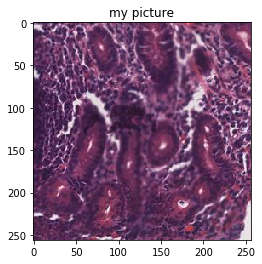

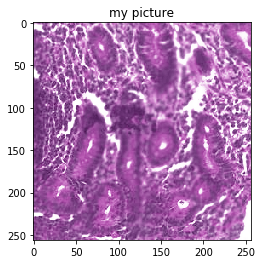

130380_6726_001_3300_1200_0 Saved! Count: 10000  
 /scratch/as3ek/data_segments/data_balanced_duplicate_sample/train/EE/130380_6726_001_3300_1200_0.jpg
10001 111_2800_8600_0
10002 77_3250_3250_0
10003 79_8500_4750_0
10004 130376_6728_001_3600_1100_0
10005 130365_6716_001_2324_498_0
10006 130365_6716_001_4316_5478_0
10007 87_1494_6972_0
10008 111_2158_3154_0
10009 130377_6729_001_5661_2109_0
10010 130377_6729_001_3800_3500_0
10011 130370_6722_001_2750_13625_0
10012 77_4316_5810_0
10013 77_1200_2600_0
10014 79_3984_3652_0
10015 120_6000_4750_0
10016 23_6142_8300_0
10017 130378_6730_001_700_7900_0
10018 87_4750_2000_0
10019 130373_6725_001_300_4500_0
10020 130370_6722_001_5254_13490_0
10021 87_1660_4150_0
10022 130365_6716_001_2400_5000_0
10023 85_2600_5400_0
10024 42_3154_3984_0
10025 130373_6725_002_1000_4250_0
10026 29_4500_4750_0
10027 120_5976_9130_0
10028 79_1332_3330_0
10029 73_4814_3652_0
10030 120_4150_5644_0
10031 130369_6721_001_7968_12450_0
10032 59_3486_2158_0
10033 130378_67

10293 130369_6721_001_4800_15400_0
10294 77_7750_8500_0
10295 85_4814_830_0
10296 130380_6726_001_900_0_0
10297 130376_6728_001_6875_875_0
10298 130377_6729_001_5125_625_0
10299 50_3486_1328_0
10300 130373_6725_002_2600_2900_0
10301 73_5600_3400_0
10302 108_5146_2158_0
10303 130380_6726_001_3692_426_0
10304 23_15600_2400_0
10305 120_10956_3984_0
10306 130379_6731_002_1332_7104_0
10307 23_13500_5750_0
10308 23_5146_12118_0
10309 111_1332_3663_0
10310 35_2822_6640_0
10311 50_332_5478_0
10312 130369_6721_001_2324_15770_0
10313 22_5328_5328_0
10314 58_6972_2158_0
10315 85_4750_6750_0
10316 79_6660_2664_0
10317 130378_6730_002_2442_2775_0
10318 130372_6724_001_2100_4500_0
10319 130377_6729_001_3250_4250_0
10320 73_2000_9250_0
10321 22_5200_4000_0
10322 77_4400_7400_0
10323 50_5600_1000_0
10324 130372_6724_001_5550_2997_0
10325 130365_6716_001_1500_375_0
10326 77_6142_8300_0
10327 130378_6730_002_750_3500_0
10328 120_3486_8964_0
10329 130373_6725_001_4000_800_0
10330 22_2490_4482_0
10331 130

10582 77_5976_9462_0
10583 85_2664_6660_0
10584 22_3818_7138_0
10585 23_7138_8300_0
10586 85_4000_800_0
10587 130369_6721_001_2775_16317_0
10588 130376_6728_001_2500_900_0
10589 130370_6722_001_9794_3154_0
10590 85_6993_5328_0
10591 22_5600_2600_0
10592 42_2324_5976_0
10593 130369_6721_001_7875_10625_0
10594 22_1332_3996_0
10595 73_5976_332_0
10596 130369_6721_001_6327_14874_0
10597 130369_6721_001_2625_16250_0
10598 79_2200_2200_0
10599 85_3320_7138_0
10600 23_1332_9657_0
10601 79_6142_6806_0
10602 130373_6725_001_3124_1420_0
10603 130370_6722_001_8000_12100_0
10604 130378_6730_001_1300_7800_0
10605 87_3400_3800_0
10606 130373_6725_001_3154_1328_0
10607 130370_6722_001_11500_3125_0
10608 35_6972_4648_0
10609 77_3154_5312_0
10610 130370_6722_001_12875_2500_0
10611 130370_6722_001_5550_12210_0
10612 130372_6724_001_600_10200_0
10613 130373_6725_002_4482_664_0
10614 130369_6721_001_7384_9372_0
10615 108_6800_6400_0
10616 130373_6725_002_125_3625_0
10617 59_3800_1800_0
10618 51_3600_1000_

10879 130378_6730_002_1162_2822_0
10880 130373_6725_002_3219_1110_0
10881 79_5478_3818_0
10882 130372_6724_001_1494_8798_0
10883 11_2822_1494_0
10884 42_4000_3250_0
10885 130373_6725_001_3900_2000_0
10886 120_10292_3818_0
10887 130377_6729_001_4250_3500_0
10888 130369_6721_001_994_17324_0
10889 50_3996_8991_0
10890 79_5146_5644_0
10891 130378_6730_002_555_6771_0
10892 111_498_7304_0
10893 130370_6722_001_11786_2698_0
10894 130378_6730_001_800_4800_0
10895 130379_6731_002_6300_1200_0
10896 77_5644_1328_0
10897 22_2490_6806_0
10898 130370_6722_001_7300_12900_0
10899 120_8000_5600_0
10900 130379_6731_001_2500_3700_0
10901 130373_6725_002_0_3885_0
10902 84_5478_3984_0
10903 130373_6725_002_3486_1328_0
10904 130379_6731_001_5112_3408_0
10905 58_4400_4000_0
10906 35_4814_664_0
10907 23_11750_4500_0
10908 130372_6724_001_1887_6105_0
10909 130377_6729_001_5250_625_0
10910 130372_6724_001_5810_3984_0
10911 130370_6722_001_5375_11750_0
10912 84_4600_800_0
10913 130379_6731_001_1900_5700_0
10914 

11171 108_6000_5600_0
11172 50_3154_3984_0
11173 130379_6731_001_2750_5625_0
11174 130370_6722_001_8769_2775_0
11175 130369_6721_001_8750_9250_0
11176 130369_6721_001_5644_10956_0
11177 73_3320_3652_0
11178 130377_6729_001_4662_3663_0
11179 108_5328_1998_0
11180 130373_6725_002_3663_2775_0
11181 42_4000_3750_0
11182 130370_6722_001_4700_13600_0
11183 120_3486_5478_0
11184 130369_6721_001_7800_12400_0
11185 130369_6721_001_11786_9656_0
11186 130365_6716_001_3875_5250_0
11187 120_4800_5000_0
11188 23_6600_8800_0
11189 108_1826_5312_0
11190 130372_6724_001_222_10878_0
11191 120_9800_4600_0
11192 23_12450_6308_0
11193 23_5644_9628_0
11194 130369_6721_001_5106_16095_0
11195 23_6200_2400_0
11196 130370_6722_001_13300_3600_0
11197 23_8134_4980_0
11198 130370_6722_001_2400_13400_0
11199 130365_6716_001_900_2600_0
11200 35_1400_5600_0
11201 108_7400_7600_0
11202 130372_6724_001_3408_3266_0
11203 77_6806_5146_0
11204 130379_6731_002_5400_2800_0
11205 23_6640_10624_0
11206 23_5994_11322_0
11207 7

11456 42_4648_1660_0
11457 130376_6728_001_332_166_0
11458 130378_6730_001_710_6390_0
11459 79_2490_4814_0
11460 130369_6721_001_10878_9102_0
11461 130370_6722_001_9100_13100_0
11462 130372_6724_001_5883_3108_0
11463 130379_6731_001_444_5994_0
11464 130370_6722_001_1554_11433_0
11465 130378_6730_001_1988_4118_0
11466 130369_6721_001_1992_2656_0
11467 11_4600_4200_0
11468 130370_6722_001_10366_2840_0
11469 130380_6726_001_2272_1420_0
11470 84_3320_2158_0
11471 50_400_7200_0
11472 130370_6722_001_11322_3774_0
11473 77_4200_1000_0
11474 29_5146_4316_0
11475 130373_6725_001_3500_1000_0
11476 130373_6725_001_5125_875_0
11477 108_5200_8000_0
11478 130372_6724_001_200_11600_0
11479 130377_6729_001_2556_5112_0
11480 130365_6716_001_2442_4662_0
11481 130372_6724_001_400_10600_0
11482 130379_6731_001_2750_2625_0
11483 23_15400_1800_0
11484 130376_6728_001_4551_1554_0
11485 130382_6718_001_2500_2375_0
11486 130373_6725_001_3000_2800_0
11487 130379_6731_002_2375_3875_0
11488 120_10200_4200_0
11489

11748 130369_6721_001_4482_13446_0
11749 130380_6726_001_3250_1750_0
11750 130379_6731_002_1443_5772_0
11751 77_4200_5400_0
11752 11_2500_4750_0
11753 130372_6724_001_2664_3996_0
11754 130370_6722_001_2750_11625_0
11755 22_1328_4150_0
11756 130378_6730_002_2220_4329_0
11757 42_3750_2250_0
11758 42_6308_4648_0
11759 130380_6726_001_4100_1200_0
11760 130369_6721_001_700_17700_0
11761 79_6600_5600_0
11762 77_5810_8964_0
11763 130378_6730_002_1625_4875_0
11764 130379_6731_001_5700_1300_0
11765 111_6474_4150_0
11766 130370_6722_001_999_10212_0
11767 130369_6721_001_10878_8436_0
11768 108_8658_9324_0
11769 108_8000_6200_0
11770 130373_6725_001_800_4100_0
11771 130369_6721_001_9794_10624_0
11772 130379_6731_002_2000_3000_0
11773 120_10624_5976_0
11774 130365_6716_001_2100_2700_0
11775 130370_6722_001_8964_2490_0
11776 85_5644_4980_0
11777 130370_6722_001_11625_2625_0
11778 130365_6716_001_1300_1800_0
11779 23_1162_8964_0
11780 77_666_1665_0
11781 51_1494_3320_0
11782 130376_6728_001_2556_1562

12039 130377_6729_001_5106_3330_0
12040 11_2750_1750_0
12041 50_5800_1400_0
12042 50_2331_1665_0
12043 77_3750_500_0
12044 130379_6731_001_5125_1875_0
12045 50_6000_4500_0
12046 130370_6722_001_1221_12099_0
12047 22_5312_5478_0
12048 108_2158_6806_0
12049 120_6972_5312_0
12050 130373_6725_002_4329_666_0
12051 85_5250_1250_0
12052 120_7000_3000_0
12053 108_5000_2400_0
12054 130370_6722_001_10200_3000_0
12055 130379_6731_002_6806_1660_0
12056 130376_6728_001_250_500_0
12057 130377_6729_001_875_5125_0
12058 130378_6730_001_1700_4400_0
12059 11_3996_3996_0
12060 51_6474_2656_0
12061 108_8134_9794_0
12062 84_1998_4329_0
12063 51_3154_1992_0
12064 130378_6730_002_750_4250_0
12065 130369_6721_001_4400_600_0
12066 130369_6721_001_1554_2775_0
12067 42_1494_4648_0
12068 29_1660_2988_0
12069 130365_6716_001_3875_4500_0
12070 58_8000_5200_0
12071 50_5994_3330_0
12072 130378_6730_001_875_5625_0
12073 130378_6730_001_1776_7659_0
12074 22_2988_7138_0
12075 35_6000_3600_0
12076 130382_6718_001_2500_12

12336 130373_6725_001_3200_3100_0
12337 130376_6728_001_2200_700_0
12338 130370_6722_001_8964_12284_0
12339 108_6327_6660_0
12340 130378_6730_001_750_4625_0
12341 29_3984_3818_0
12342 77_1250_3500_0
12343 77_800_800_0
12344 130370_6722_001_1000_12000_0
12345 130376_6728_001_3996_1554_0
12346 120_3320_9130_0
12347 23_2200_8000_0
12348 130377_6729_001_5300_700_0
12349 130365_6716_001_1221_888_0
12350 59_2200_3800_0
12351 51_2000_3000_0
12352 130382_6718_001_2250_500_0
12353 130373_6725_001_1998_2553_0
12354 130370_6722_001_13280_4150_0
12355 23_11750_3250_0
12356 22_2664_5994_0
12357 84_3486_4316_0
12358 130370_6722_001_9875_3500_0
12359 23_14940_5478_0
12360 130376_6728_001_2331_333_0
12361 130377_6729_001_2250_4750_0
12362 130369_6721_001_8300_12782_0
12363 130373_6725_001_5112_568_0
12364 130379_6731_002_300_6900_0
12365 130370_6722_001_7881_11988_0
12366 108_3652_3154_0
12367 130365_6716_001_2200_600_0
12368 73_6000_7400_0
12369 130373_6725_001_3250_2500_0
12370 130370_6722_001_11375

12627 130369_6721_001_6216_10878_0
12628 29_3486_996_0
12629 130372_6724_001_3250_1500_0
12630 51_1162_2158_0
12631 120_9400_4800_0
12632 120_13280_3984_0
12633 130373_6725_001_3000_1300_0
12634 77_6640_3652_0
12635 73_4482_1660_0
12636 23_15400_3400_0
12637 130382_6718_001_2750_1625_0
12638 130370_6722_001_2500_12400_0
12639 130379_6731_002_2886_4218_0
12640 130379_6731_001_2875_4875_0
12641 130377_6729_001_1992_4482_0
12642 51_1992_3154_0
12643 108_5146_6308_0
12644 73_3400_9400_0
12645 87_4648_3486_0
12646 130379_6731_002_5700_1000_0
12647 111_3000_6750_0
12648 73_5661_7659_0
12649 85_2600_3000_0
12650 130373_6725_001_2300_3500_0
12651 29_3000_1000_0
12652 130379_6731_002_5772_1221_0
12653 130378_6730_002_500_1750_0
12654 85_2822_1494_0
12655 130378_6730_002_1500_1750_0
12656 130373_6725_002_2100_3600_0
12657 130376_6728_001_2900_1500_0
12658 130378_6730_001_500_1900_0
12659 29_1998_2997_0
12660 120_12284_2822_0
12661 130369_6721_001_1600_3200_0
12662 130369_6721_001_4000_13200_0
12

12920 120_10956_5644_0
12921 130369_6721_001_7659_13986_0
12922 130379_6731_001_2775_1776_0
12923 108_1992_3652_0
12924 130370_6722_001_12300_4200_0
12925 130372_6724_001_5680_3976_0
12926 22_6308_2490_0
12927 130369_6721_001_9794_11454_0
12928 130369_6721_001_10224_10366_0
12929 130365_6716_001_4300_5400_0
12930 130365_6716_001_2375_3375_0
12931 85_3984_1992_0
12932 84_4482_3818_0
12933 22_3750_5000_0
12934 85_4400_7000_0
12935 29_4600_600_0
12936 59_3984_1660_0
12937 130370_6722_001_10878_2664_0
12938 130379_6731_002_1221_6549_0
12939 130382_6718_001_830_3818_0
12940 130380_6726_001_3625_1500_0
12941 130378_6730_001_2158_4814_0
12942 59_8500_4000_0
12943 130379_6731_001_3108_1998_0
12944 79_3750_8000_0
12945 130379_6731_001_4551_3774_0
12946 85_3000_5800_0
12947 130370_6722_001_6993_11877_0
12948 130379_6731_001_6700_1200_0
12949 130370_6722_001_1000_12125_0
12950 77_0_1826_0
12951 130372_6724_001_2900_5200_0
12952 130379_6731_002_4551_3885_0
12953 130379_6731_001_852_7242_0
12954 12

13214 130373_6725_001_5112_284_0
13215 120_4800_8600_0
13216 130369_6721_001_5900_11000_0
13217 59_7500_2750_0
13218 51_4000_2250_0
13219 130372_6724_001_1998_10323_0
13220 130379_6731_002_2300_2900_0
13221 130379_6731_001_666_5994_0
13222 23_2664_9657_0
13223 130377_6729_001_4100_4200_0
13224 130378_6730_001_1562_5964_0
13225 130369_6721_001_4482_12118_0
13226 79_7400_6200_0
13227 42_3486_5146_0
13228 59_6000_3250_0
13229 130369_6721_001_4814_12118_0
13230 130370_6722_001_3330_13320_0
13231 130373_6725_001_4300_1800_0
13232 77_4814_5644_0
13233 130372_6724_001_2664_4107_0
13234 59_8000_4250_0
13235 130370_6722_001_5328_11877_0
13236 23_4662_12321_0
13237 84_3652_3984_0
13238 130372_6724_001_2490_4482_0
13239 11_5000_5800_0
13240 130377_6729_001_1800_4600_0
13241 130379_6731_001_1000_5700_0
13242 120_5400_9000_0
13243 108_6800_6200_0
13244 130378_6730_001_1100_4000_0
13245 85_7600_6000_0
13246 111_2800_9200_0
13247 130378_6730_002_1800_4500_0
13248 130376_6728_001_2125_250_0
13249 1303

13509 23_3330_8325_0
13510 11_3800_4800_0
13511 23_3600_3000_0
13512 130379_6731_001_1992_2988_0
13513 130380_6726_001_1110_777_0
13514 130380_6726_001_3996_555_0
13515 130379_6731_001_2200_3100_0
13516 130369_6721_001_10956_10458_0
13517 130370_6722_001_9514_2130_0
13518 23_3500_8000_0
13519 130365_6716_001_1660_166_0
13520 130370_6722_001_11786_2130_0
13521 84_664_4316_0
13522 22_6142_2324_0
13523 130372_6724_001_1988_10650_0
13524 35_5994_4329_0
13525 50_6800_2000_0
13526 130369_6721_001_8436_8880_0
13527 130380_6726_001_1300_100_0
13528 120_2600_4200_0
13529 130369_6721_001_3700_700_0
13530 130378_6730_001_1110_666_0
13531 130379_6731_002_2500_2500_0
13532 130369_6721_001_9768_9213_0
13533 130378_6730_002_1400_5500_0
13534 130369_6721_001_1100_17700_0
13535 23_4200_4000_0
13536 130381_6723_001_111_333_0
13537 120_10000_5750_0
13538 130372_6724_001_3250_9875_0
13539 130369_6721_001_3154_996_0
13540 130372_6724_001_5439_3441_0
13541 130380_6726_001_1826_996_0
13542 23_6142_11786_0
13

13794 130378_6730_001_2100_7200_0
13795 130369_6721_001_4686_14910_0
13796 50_1992_5810_0
13797 77_7636_7636_0
13798 11_3600_3200_0
13799 130380_6726_001_3625_1000_0
13800 120_3818_6806_0
13801 130378_6730_002_800_0_0
13802 130369_6721_001_5600_11200_0
13803 130370_6722_001_8436_13209_0
13804 59_8400_2600_0
13805 130370_6722_001_400_11800_0
13806 108_5661_4329_0
13807 130373_6725_002_1250_3375_0
13808 130377_6729_001_5964_1846_0
13809 130369_6721_001_6106_15762_0
13810 50_3320_3320_0
13811 77_3800_200_0
13812 120_12654_3663_0
13813 130377_6729_001_1750_5625_0
13814 130370_6722_001_2625_13750_0
13815 130372_6724_001_1875_10125_0
13816 50_1750_5750_0
13817 108_6806_7636_0
13818 130378_6730_001_1300_7100_0
13819 50_6142_2324_0
13820 130369_6721_001_600_3100_0
13821 108_6400_4400_0
13822 108_8798_7138_0
13823 111_3800_5800_0
13824 85_5000_3000_0
13825 111_3330_6327_0
13826 130376_6728_001_1110_111_0
13827 130379_6731_001_4884_2997_0
13828 111_1800_8200_0
13829 22_2158_3320_0
13830 130365_6

14087 130378_6730_001_666_3219_0
14088 73_4482_6474_0
14089 77_5750_3000_0
14090 130372_6724_001_600_11800_0
14091 130369_6721_001_994_19028_0
14092 130379_6731_002_6105_999_0
14093 130373_6725_001_900_4000_0
14094 79_2664_6327_0
14095 130380_6726_001_2220_222_0
14096 77_1200_2200_0
14097 130379_6731_002_999_5328_0
14098 35_2800_3600_0
14099 130369_6721_001_5217_14985_0
14100 130369_6721_001_10600_10900_0
14101 58_3400_2000_0
14102 130369_6721_001_10400_9900_0
14103 22_3818_6806_0
14104 130369_6721_001_3330_1332_0
14105 130378_6730_001_1000_1600_0
14106 130377_6729_001_1500_6250_0
14107 130370_6722_001_2200_12800_0
14108 130370_6722_001_4750_13375_0
14109 130369_6721_001_10375_9750_0
14110 120_3750_8000_0
14111 130373_6725_001_3124_1562_0
14112 120_3984_7968_0
14113 130370_6722_001_5875_12125_0
14114 130369_6721_001_5254_11218_0
14115 108_1000_6200_0
14116 130373_6725_002_2997_3552_0
14117 73_3330_4329_0
14118 130378_6730_001_750_3375_0
14119 77_6993_5994_0
14120 130381_6723_001_0_426_

14372 22_6308_5312_0
14373 87_2656_5976_0
14374 77_2988_4648_0
14375 130376_6728_001_4329_999_0
14376 130372_6724_001_3692_10224_0
14377 130373_6725_001_900_3700_0
14378 79_1162_5146_0
14379 130372_6724_001_3500_10300_0
14380 130369_6721_001_4260_15478_0
14381 130373_6725_001_2000_3600_0
14382 11_4500_3000_0
14383 130377_6729_001_5312_1162_0
14384 87_1998_2331_0
14385 130378_6730_001_1162_4150_0
14386 23_3800_7800_0
14387 108_6000_3750_0
14388 130365_6716_001_2750_3250_0
14389 79_5976_2158_0
14390 35_5661_1332_0
14391 130369_6721_001_6958_9940_0
14392 130372_6724_001_5200_4300_0
14393 130373_6725_001_2875_1125_0
14394 87_1826_7138_0
14395 130378_6730_001_1375_750_0
14396 42_2324_5478_0
14397 130369_6721_001_5644_14774_0
14398 85_7304_3486_0
14399 130370_6722_001_9213_2775_0
14400 120_6640_8964_0
14401 130379_6731_002_4875_3375_0
14402 23_3652_2656_0
14403 108_3663_6327_0
14404 23_5976_4980_0
14405 130369_6721_001_8000_10250_0
14406 130378_6730_001_1500_5400_0
14407 77_999_1332_0
14408 

14663 130369_6721_001_9250_10125_0
14664 29_3800_4400_0
14665 130369_6721_001_5478_15604_0
14666 130376_6728_001_3266_1278_0
14667 130377_6729_001_1328_5312_0
14668 85_2988_1992_0
14669 111_2600_6000_0
14670 130370_6722_001_8625_2625_0
14671 108_9800_7200_0
14672 111_4662_2331_0
14673 111_3663_4995_0
14674 130369_6721_001_1500_3375_0
14675 130379_6731_002_5800_900_0
14676 130382_6718_001_1443_1110_0
14677 130377_6729_001_3300_3900_0
14678 77_166_1328_0
14679 108_6142_5644_0
14680 130373_6725_002_1500_4200_0
14681 50_3818_7138_0
14682 130369_6721_001_1328_2324_0
14683 130379_6731_001_5976_1494_0
14684 130379_6731_002_3125_3375_0
14685 120_11988_4995_0
14686 130369_6721_001_9300_11500_0
14687 85_7968_2656_0
14688 130373_6725_002_4118_2272_0
14689 77_166_1826_0
14690 130380_6726_001_2800_1100_0
14691 73_3154_3320_0
14692 79_7138_6640_0
14693 130379_6731_001_6700_1300_0
14694 130379_6731_002_2886_2664_0
14695 130372_6724_001_1875_10250_0
14696 130379_6731_002_2125_4125_0
14697 130376_6728_

14956 130379_6731_001_2875_1875_0
14957 22_5400_4800_0
14958 130373_6725_001_1400_3700_0
14959 130379_6731_002_3692_3408_0
14960 130372_6724_001_1250_12250_0
14961 130369_6721_001_8100_11900_0
14962 111_1400_6400_0
14963 108_7500_8750_0
14964 130382_6718_001_2840_710_0
14965 130369_6721_001_9600_8700_0
14966 130382_6718_001_1443_1221_0
14967 120_7470_4648_0
14968 130378_6730_002_900_2600_0
14969 130378_6730_002_2442_6216_0
14970 120_3750_7500_0
14971 73_4995_6660_0
14972 130370_6722_001_12321_3330_0
14973 29_2656_1162_0
14974 130377_6729_001_3408_4686_0
14975 130378_6730_002_1000_7625_0
14976 29_5146_2988_0
14977 130372_6724_001_3700_1000_0
14978 35_2600_2600_0
14979 120_11250_4500_0
14980 108_7400_10000_0
14981 130373_6725_001_3625_625_0
14982 130372_6724_001_1332_10212_0
14983 130376_6728_001_1800_1400_0
14984 130379_6731_001_4329_3885_0
14985 130369_6721_001_5538_14484_0
14986 29_2988_2158_0
14987 130372_6724_001_5300_3400_0
14988 130373_6725_002_5200_400_0
14989 50_6142_4814_0
1499

15246 59_3320_1494_0
15247 130365_6716_001_2442_4884_0
15248 130373_6725_002_3375_750_0
15249 77_1250_3750_0
15250 23_13750_2500_0
15251 111_3000_6500_0
15252 130376_6728_001_2982_1704_0
15253 73_3984_8798_0
15254 130378_6730_002_2158_6972_0
15255 77_200_1200_0
15256 50_5750_7250_0
15257 130373_6725_001_2625_1750_0
15258 85_3500_7000_0
15259 130379_6731_002_3700_2100_0
15260 111_1328_9130_0
15261 59_7000_1250_0
15262 23_7138_10790_0
15263 35_7200_2600_0
15264 50_2500_8250_0
15265 130378_6730_001_2324_6142_0
15266 50_4500_6000_0
15267 130380_6726_001_2250_625_0
15268 85_3600_6400_0
15269 130372_6724_001_1826_9130_0
15270 50_3486_4482_0
15271 111_2000_2750_0
15272 130380_6726_001_1500_1200_0
15273 50_996_6474_0
15274 130365_6716_001_3652_4814_0
15275 85_1826_4814_0
15276 130365_6716_001_1625_4375_0
15277 77_6474_9628_0
15278 23_2600_9000_0
15279 120_8500_3750_0
15280 130370_6722_001_10600_2900_0
15281 130379_6731_002_3375_3625_0
15282 77_7000_6800_0
15283 130372_6724_001_5106_4329_0
1528

15541 111_4200_6000_0
15542 111_3486_7138_0
15543 130380_6726_001_4125_1125_0
15544 130372_6724_001_2982_5396_0
15545 130369_6721_001_222_19425_0
15546 130377_6729_001_3885_3330_0
15547 130378_6730_002_900_1200_0
15548 130369_6721_001_400_18200_0
15549 130372_6724_001_4400_8500_0
15550 130379_6731_001_500_6400_0
15551 35_4250_2000_0
15552 130381_6723_001_750_625_0
15553 87_2324_166_0
15554 130380_6726_001_1400_700_0
15555 130379_6731_002_4750_2875_0
15556 130373_6725_002_3408_2840_0
15557 35_7659_1665_0
15558 111_996_8466_0
15559 130365_6716_001_1600_500_0
15560 130370_6722_001_1494_10790_0
15561 108_7992_6660_0
15562 11_3486_3486_0
15563 23_15106_3818_0
15564 130377_6729_001_1846_4970_0
15565 120_7600_3800_0
15566 50_2324_4482_0
15567 130372_6724_001_3996_8880_0
15568 130369_6721_001_2490_2158_0
15569 87_2158_1328_0
15570 130372_6724_001_996_10790_0
15571 108_7470_3984_0
15572 130369_6721_001_10875_10250_0
15573 130369_6721_001_2490_15770_0
15574 130379_6731_001_1704_4828_0
15575 77_6

15825 130369_6721_001_4250_13000_0
15826 130380_6726_001_1776_1221_0
15827 111_1328_7802_0
15828 130370_6722_001_9230_2130_0
15829 22_4482_2822_0
15830 130370_6722_001_2600_12500_0
15831 130379_6731_001_5900_1900_0
15832 84_2400_5800_0
15833 130373_6725_002_4551_444_0
15834 11_3486_2988_0
15835 87_4250_4000_0
15836 29_4800_1800_0
15837 130373_6725_001_3125_2750_0
15838 130379_6731_001_2331_5661_0
15839 130380_6726_001_2600_200_0
15840 23_7750_4250_0
15841 130370_6722_001_2200_10900_0
15842 130365_6716_001_1900_2300_0
15843 130370_6722_001_4980_12948_0
15844 130370_6722_001_12375_2625_0
15845 130372_6724_001_1998_10989_0
15846 130365_6716_001_1443_2331_0
15847 130373_6725_001_200_4100_0
15848 73_7636_498_0
15849 130377_6729_001_5112_852_0
15850 111_830_2324_0
15851 73_3486_9130_0
15852 84_5600_3600_0
15853 120_7750_3000_0
15854 111_3600_2000_0
15855 130369_6721_001_2300_1300_0
15856 130379_6731_002_1500_6300_0
15857 108_4329_4662_0
15858 130378_6730_002_1900_6200_0
15859 108_6600_6800_0

16107 77_1200_2000_0
16108 58_1494_166_0
16109 108_1494_5976_0
16110 130377_6729_001_3550_3408_0
16111 35_6200_2200_0
16112 130365_6716_001_1278_3976_0
16113 130379_6731_001_2272_2698_0
16114 77_6308_5146_0
16115 22_400_3200_0
16116 58_7200_2600_0
16117 73_7470_4150_0
16118 77_4662_5661_0
16119 23_830_8134_0
16120 85_3600_6200_0
16121 130365_6716_001_3692_4544_0
16122 130377_6729_001_4440_1776_0
16123 35_5600_2000_0
16124 79_4600_7400_0
16125 130370_6722_001_4316_12948_0
16126 130378_6730_002_1600_3900_0
16127 120_3154_6640_0
16128 120_3400_7600_0
16129 130377_6729_001_2900_4700_0
16130 111_4814_2988_0
16131 130365_6716_001_1700_4400_0
16132 120_11000_4400_0
16133 73_6142_6806_0
16134 77_400_1200_0
16135 130378_6730_001_2250_6375_0
16136 77_800_3000_0
16137 108_5600_6200_0
16138 130369_6721_001_999_2553_0
16139 120_8632_4980_0
16140 50_4814_5644_0
16141 77_999_1998_0
16142 23_4250_750_0
16143 23_7138_3818_0
16144 51_2490_3320_0
16145 42_1328_2988_0
16146 73_6308_2490_0
16147 108_1400_5

16406 130379_6731_002_5106_2664_0
16407 85_6640_6474_0
16408 130373_6725_001_2840_3834_0
16409 130380_6726_001_4375_1250_0
16410 130378_6730_002_1162_7968_0
16411 111_2822_8134_0
16412 35_4000_4600_0
16413 79_3800_4400_0
16414 22_830_2656_0
16415 130378_6730_002_1554_7659_0
16416 130372_6724_001_1200_9700_0
16417 130382_6718_001_1443_4218_0
16418 130378_6730_002_1800_2900_0
16419 111_5000_2200_0
16420 111_5750_3500_0
16421 130378_6730_002_800_7200_0
16422 108_5810_8964_0
16423 50_2490_5478_0
16424 130370_6722_001_11875_2875_0
16425 130369_6721_001_11000_10300_0
16426 22_4150_7802_0
16427 130379_6731_001_2414_4544_0
16428 130378_6730_002_1328_3486_0
16429 130369_6721_001_830_18924_0
16430 23_9628_9960_0
16431 130369_6721_001_6816_10366_0
16432 87_3750_5000_0
16433 130379_6731_001_3125_2375_0
16434 22_1826_4814_0
16435 130377_6729_001_5538_1846_0
16436 120_4800_6400_0
16437 130373_6725_002_2400_3700_0
16438 130377_6729_001_2324_5478_0
16439 130373_6725_002_1100_4100_0
16440 130380_6726_0

16698 130379_6731_002_498_5810_0
16699 50_3000_6600_0
16700 130372_6724_001_2625_1750_0
16701 11_6142_5644_0
16702 130369_6721_001_498_17762_0
16703 130378_6730_001_2300_6300_0
16704 108_2331_7326_0
16705 50_5312_3984_0
16706 50_5800_6800_0
16707 29_1328_1328_0
16708 85_3996_999_0
16709 130378_6730_001_500_300_0
16710 130369_6721_001_3250_1375_0
16711 85_2400_7800_0
16712 11_3818_3818_0
16713 51_2324_1660_0
16714 130370_6722_001_6625_12250_0
16715 120_4000_9200_0
16716 42_4250_3250_0
16717 23_4995_7326_0
16718 29_1826_3320_0
16719 35_7802_2822_0
16720 130376_6728_001_4500_1250_0
16721 130369_6721_001_9230_10082_0
16722 130378_6730_001_2400_5500_0
16723 79_6327_4662_0
16724 130372_6724_001_2698_3976_0
16725 23_498_7138_0
16726 73_3400_4600_0
16727 120_6400_5400_0
16728 130380_6726_001_2324_664_0
16729 85_1000_5800_0
16730 130370_6722_001_888_9990_0
16731 42_1494_2656_0
16732 130377_6729_001_4800_3000_0
16733 87_1600_1000_0
16734 130370_6722_001_2000_11400_0
16735 50_3750_5750_0
16736 51

16994 22_1600_4800_0
16995 59_6400_3400_0
16996 22_5750_6500_0
16997 59_8600_2000_0
16998 130378_6730_002_1800_6100_0
16999 130379_6731_001_3125_5750_0
17000 130378_6730_002_1400_5300_0
17001 130382_6718_001_2664_1110_0
17002 59_8400_2800_0
17003 35_2997_3330_0
17004 77_4000_5400_0
17005 85_2656_2324_0
17006 120_3663_5994_0
17007 84_4400_4000_0
17008 130379_6731_002_1221_4884_0
17009 130376_6728_001_1300_500_0
17010 130369_6721_001_1665_17094_0
17011 23_14608_996_0
17012 85_3000_1000_0
17013 111_4000_8800_0
17014 130377_6729_001_2900_3900_0
17015 130378_6730_002_2700_7200_0
17016 23_8800_10000_0
17017 130376_6728_001_6771_888_0
17018 130379_6731_001_1221_3330_0
17019 130379_6731_002_2130_2272_0
17020 73_7800_4400_0
17021 73_166_7138_0
17022 130376_6728_001_2272_1562_0
17023 11_2331_1998_0
17024 108_5600_9000_0
17025 130369_6721_001_10875_11000_0
17026 130369_6721_001_3200_16000_0
17027 130372_6724_001_3552_5217_0
17028 77_1400_3400_0
17029 130369_6721_001_9514_10792_0
17030 42_2200_460

17288 22_3400_1400_0
17289 23_1494_10292_0
17290 11_4482_3984_0
17291 87_2490_1494_0
17292 120_8200_3000_0
17293 108_9400_6600_0
17294 130377_6729_001_333_6660_0
17295 130379_6731_002_2553_5661_0
17296 22_5994_4995_0
17297 77_6806_3818_0
17298 130365_6716_001_1776_3996_0
17299 130378_6730_002_2250_6750_0
17300 130377_6729_001_1826_4814_0
17301 85_5146_2158_0
17302 22_4329_4995_0
17303 130380_6726_001_3700_1000_0
17304 130373_6725_001_1992_3984_0
17305 77_5312_2822_0
17306 130370_6722_001_2000_12125_0
17307 59_7992_333_0
17308 73_4200_4600_0
17309 130378_6730_002_250_500_0
17310 22_500_3750_0
17311 111_4400_2400_0
17312 130370_6722_001_8547_12654_0
17313 111_1665_3996_0
17314 130378_6730_001_2698_6958_0
17315 111_2200_600_0
17316 130370_6722_001_710_10082_0
17317 73_7750_3250_0
17318 11_1600_4600_0
17319 130369_6721_001_8964_9960_0
17320 120_2400_5800_0
17321 120_7500_3000_0
17322 50_3600_9200_0
17323 51_4000_2600_0
17324 130370_6722_001_11800_2300_0
17325 130372_6724_001_625_11125_0
17

17581 77_6993_4995_0
17582 77_6660_2997_0
17583 130369_6721_001_9400_11100_0
17584 130382_6718_001_2700_300_0
17585 35_4150_3320_0
17586 130370_6722_001_2988_12948_0
17587 23_14400_3000_0
17588 111_2664_6327_0
17589 120_8600_6600_0
17590 130370_6722_001_7384_11786_0
17591 130377_6729_001_4500_1750_0
17592 130369_6721_001_7600_9600_0
17593 130377_6729_001_4875_1500_0
17594 11_2600_4400_0
17595 130376_6728_001_3875_1500_0
17596 51_3984_1992_0
17597 130373_6725_002_3266_3124_0
17598 50_4400_2800_0
17599 50_7304_3652_0
17600 130380_6726_001_2800_900_0
17601 130380_6726_001_2272_1704_0
17602 23_14200_5000_0
17603 130379_6731_002_5250_1375_0
17604 130378_6730_001_1300_1700_0
17605 130370_6722_001_9125_2750_0
17606 85_3250_2250_0
17607 120_11000_5750_0
17608 130373_6725_002_2400_2100_0
17609 130372_6724_001_1800_10800_0
17610 108_5810_3984_0
17611 130379_6731_002_5644_2822_0
17612 130372_6724_001_2750_3125_0
17613 130370_6722_001_12780_3976_0
17614 23_5400_7800_0
17615 29_3800_600_0
17616 130

17874 130377_6729_001_4260_3692_0
17875 108_5400_8000_0
17876 130373_6725_001_3250_2750_0
17877 58_7500_3000_0
17878 130379_6731_002_1332_6882_0
17879 73_3652_6308_0
17880 84_1992_6142_0
17881 130379_6731_001_6500_1400_0
17882 79_4000_5600_0
17883 130372_6724_001_900_10400_0
17884 50_3000_7800_0
17885 130369_6721_001_7326_11322_0
17886 85_7000_4400_0
17887 11_3818_4482_0
17888 85_2400_3200_0
17889 87_1600_3200_0
17890 130372_6724_001_3124_5964_0
17891 108_8632_8964_0
17892 59_2664_3330_0
17893 130379_6731_002_6250_2375_0
17894 130381_6723_001_284_568_0
17895 130365_6716_001_2200_400_0
17896 42_1992_4150_0
17897 130379_6731_001_5250_1750_0
17898 130373_6725_002_2400_2600_0
17899 130373_6725_001_710_3692_0
17900 130377_6729_001_2500_4200_0
17901 130372_6724_001_1500_10800_0
17902 22_5250_3750_0
17903 130379_6731_002_2656_5810_0
17904 50_332_7470_0
17905 130369_6721_001_6625_14125_0
17906 22_4600_1000_0
17907 130378_6730_001_284_710_0
17908 130370_6722_001_6660_12432_0
17909 120_11600_600

18169 130365_6716_001_1200_2900_0
18170 130377_6729_001_4440_3996_0
18171 23_1494_8964_0
18172 130378_6730_001_555_1221_0
18173 42_4980_1328_0
18174 11_1400_5600_0
18175 23_5661_2664_0
18176 130378_6730_001_1704_6106_0
18177 11_4995_5328_0
18178 130372_6724_001_222_10767_0
18179 42_4000_750_0
18180 108_4200_3600_0
18181 58_7800_4000_0
18182 130369_6721_001_1988_2982_0
18183 130370_6722_001_9940_3550_0
18184 130369_6721_001_10624_9296_0
18185 130370_6722_001_6993_12654_0
18186 79_7802_5146_0
18187 120_6972_2490_0
18188 130369_6721_001_9324_11766_0
18189 130379_6731_001_2331_2220_0
18190 87_3320_1328_0
18191 130378_6730_001_1375_7375_0
18192 29_4482_830_0
18193 35_6000_4000_0
18194 73_4662_1665_0
18195 130378_6730_001_1700_7100_0
18196 35_2750_5000_0
18197 130373_6725_001_4482_1494_0
18198 120_8750_6000_0
18199 130369_6721_001_1136_17750_0
18200 35_4150_1162_0
18201 120_12284_4150_0
18202 130379_6731_002_3108_5661_0
18203 130376_6728_001_5994_555_0
18204 130370_6722_001_3441_13209_0
1820

18459 130373_6725_002_4662_1221_0
18460 130372_6724_001_3320_2988_0
18461 23_12118_5976_0
18462 111_400_6200_0
18463 130379_6731_001_5112_1704_0
18464 120_5000_6250_0
18465 85_7138_6308_0
18466 130379_6731_001_3408_4544_0
18467 130369_6721_001_8300_13500_0
18468 23_9600_9200_0
18469 130370_6722_001_8600_13200_0
18470 79_5478_4316_0
18471 130378_6730_001_1000_900_0
18472 130369_6721_001_8769_10323_0
18473 130370_6722_001_1704_13064_0
18474 130382_6718_001_1846_3408_0
18475 130378_6730_001_800_2200_0
18476 130372_6724_001_1988_5680_0
18477 85_6806_6308_0
18478 130381_6723_001_400_100_0
18479 11_1200_2000_0
18480 23_6600_11200_0
18481 130378_6730_001_1700_3100_0
18482 77_5600_1800_0
18483 130379_6731_002_3486_3652_0
18484 130370_6722_001_10250_3250_0
18485 51_4500_2500_0
18486 130369_6721_001_11433_9435_0
18487 50_2490_5810_0
18488 130380_6726_001_1900_300_0
18489 130369_6721_001_12000_10125_0
18490 130382_6718_001_1887_3108_0
18491 130378_6730_002_1000_7100_0
18492 73_3250_4750_0
18493 1

18750 130370_6722_001_2700_13600_0
18751 77_6800_6000_0
18752 22_2600_6600_0
18753 85_4482_3652_0
18754 130369_6721_001_10792_8520_0
18755 130372_6724_001_2414_5112_0
18756 111_3984_1660_0
18757 130379_6731_002_1136_7384_0
18758 35_5810_4980_0
18759 11_4980_2656_0
18760 130370_6722_001_4300_13500_0
18761 130379_6731_002_4316_3818_0
18762 79_4000_3750_0
18763 130378_6730_001_1800_5500_0
18764 130379_6731_001_5500_3200_0
18765 130365_6716_001_2200_3600_0
18766 130378_6730_002_1900_2600_0
18767 87_1332_6327_0
18768 23_5000_400_0
18769 120_8964_4814_0
18770 130379_6731_002_1375_3000_0
18771 130378_6730_002_1110_222_0
18772 50_3996_3996_0
18773 79_2000_3750_0
18774 130369_6721_001_9372_10792_0
18775 35_3250_1250_0
18776 73_3000_6250_0
18777 130379_6731_001_2600_5800_0
18778 120_8750_6250_0
18779 130379_6731_002_2158_2822_0
18780 130379_6731_002_3266_5254_0
18781 130377_6729_001_4218_4440_0
18782 22_5478_6640_0
18783 130373_6725_002_375_3125_0
18784 130379_6731_001_3486_5146_0
18785 130372_6

19045 58_250_1250_0
19046 23_1826_8964_0
19047 87_5976_4316_0
19048 59_2400_1400_0
19049 22_3818_6640_0
19050 130369_6721_001_2886_1443_0
19051 130382_6718_001_1494_4648_0
19052 108_7968_6972_0
19053 130379_6731_002_2556_2982_0
19054 29_1600_3000_0
19055 87_2656_5810_0
19056 130380_6726_001_400_500_0
19057 130369_6721_001_4700_13300_0
19058 73_5400_3800_0
19059 79_1600_1800_0
19060 111_4648_6308_0
19061 130373_6725_002_100_3100_0
19062 85_7250_4750_0
19063 85_3984_6806_0
19064 87_2250_2500_0
19065 59_8798_830_0
19066 130370_6722_001_9375_13000_0
19067 23_13750_3000_0
19068 130379_6731_001_3154_1826_0
19069 130379_6731_001_2250_5125_0
19070 23_4648_3320_0
19071 130370_6722_001_8991_13431_0
19072 130372_6724_001_1400_11100_0
19073 84_3200_5000_0
19074 130380_6726_001_2331_111_0
19075 85_3652_2656_0
19076 130373_6725_002_5125_375_0
19077 130379_6731_002_1554_5328_0
19078 84_5312_1660_0
19079 130377_6729_001_4662_4107_0
19080 130379_6731_002_6640_1992_0
19081 108_6000_4200_0
19082 130379_6

19335 130378_6730_001_1776_3774_0
19336 59_2000_1400_0
19337 120_3000_7250_0
19338 130378_6730_002_1136_3408_0
19339 108_332_5644_0
19340 130382_6718_001_2250_1875_0
19341 130379_6731_001_2331_3663_0
19342 23_5478_3984_0
19343 87_2500_250_0
19344 130373_6725_002_2625_3625_0
19345 130370_6722_001_9125_12250_0
19346 111_3250_5500_0
19347 51_1328_3154_0
19348 84_2250_3000_0
19349 50_1500_6250_0
19350 130369_6721_001_1000_2600_0
19351 130376_6728_001_4218_1110_0
19352 130378_6730_001_375_0_0
19353 59_6200_2000_0
19354 77_7000_7200_0
19355 35_3000_5000_0
19356 77_1000_1200_0
19357 85_1400_5400_0
19358 130379_6731_001_6200_1800_0
19359 130378_6730_002_750_7125_0
19360 130369_6721_001_2100_16200_0
19361 23_12118_3154_0
19362 111_1998_5994_0
19363 73_4200_2200_0
19364 79_2400_5400_0
19365 130369_6721_001_4402_426_0
19366 130369_6721_001_7800_9300_0
19367 79_7200_5200_0
19368 111_3320_2490_0
19369 130369_6721_001_4400_12200_0
19370 130369_6721_001_111_3552_0
19371 79_2000_4000_0
19372 79_5000_6

19630 120_11800_1600_0
19631 130379_6731_001_5822_1278_0
19632 130378_6730_002_2556_6816_0
19633 130370_6722_001_2775_12543_0
19634 130370_6722_001_12800_2200_0
19635 130379_6731_002_1328_3154_0
19636 22_2664_3663_0
19637 23_14750_3250_0
19638 23_15400_4400_0
19639 130369_6721_001_4884_15207_0
19640 130370_6722_001_10224_2982_0
19641 111_5312_5644_0
19642 130379_6731_002_2500_1900_0
19643 130379_6731_001_5217_2331_0
19644 130369_6721_001_7242_10508_0
19645 85_1500_4250_0
19646 130379_6731_001_3600_4000_0
19647 50_4316_6308_0
19648 120_12500_2000_0
19649 130373_6725_002_666_4440_0
19650 120_5478_9628_0
19651 50_4814_4150_0
19652 130369_6721_001_9625_11000_0
19653 130379_6731_001_1700_5300_0
19654 130372_6724_001_2775_6327_0
19655 130369_6721_001_6106_12070_0
19656 108_6660_3996_0
19657 130376_6728_001_3552_1665_0
19658 130377_6729_001_3875_4625_0
19659 111_6474_5478_0
19660 130370_6722_001_7500_13250_0
19661 130370_6722_001_12616_3320_0
19662 130370_6722_001_5439_13986_0
19663 130379_67

19919 130379_6731_002_2109_5772_0
19920 130382_6718_001_1494_3818_0
19921 58_6142_2656_0
19922 73_6400_3400_0
19923 79_1500_3500_0
19924 130378_6730_001_1494_996_0
19925 130370_6722_001_7100_12212_0
19926 73_2822_8798_0
19927 130372_6724_001_1300_9500_0
19928 51_2656_2988_0
19929 130379_6731_002_6771_1776_0
19930 130378_6730_001_1221_4551_0
19931 130369_6721_001_8300_11952_0
19932 130380_6726_001_3750_750_0
19933 130380_6726_001_1500_600_0
19934 108_8600_9400_0
19935 51_3320_1328_0
19936 111_2000_9000_0
19937 130378_6730_001_666_4107_0
19938 130369_6721_001_4980_12948_0
19939 51_3486_1992_0
19940 130370_6722_001_12782_3984_0
19941 51_2988_3486_0
19942 130378_6730_001_999_2331_0
19943 35_2600_6200_0
19944 130369_6721_001_555_18648_0
19945 130369_6721_001_2656_664_0
19946 111_1826_5146_0
19947 130376_6728_001_300_900_0
19948 120_5994_5994_0
19949 130376_6728_001_777_777_0
19950 29_3330_333_0
19951 130373_6725_001_2109_3885_0
19952 58_6660_3330_0
19953 50_1660_7636_0
19954 130378_6730_001

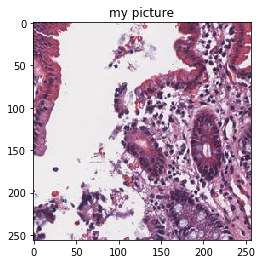

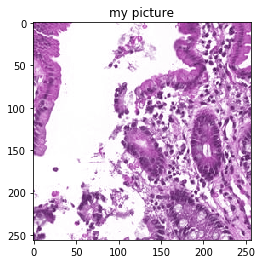

130379_6731_001_5300_1700_0 Saved! Count: 20000  
 /scratch/as3ek/data_segments/data_balanced_duplicate_sample/train/EE/130379_6731_001_5300_1700_0.jpg
20001 87_4329_6660_0
20002 29_2988_3652_0
20003 130370_6722_001_6390_12212_0
20004 130376_6728_001_1278_142_0
20005 130369_6721_001_10200_10400_0
20006 130377_6729_001_400_5600_0
20007 130379_6731_002_5810_1328_0
20008 59_2000_3200_0
20009 130369_6721_001_0_18400_0
20010 120_7400_5600_0
20011 130378_6730_001_1826_6308_0
20012 85_2250_7250_0
20013 130379_6731_002_1665_5106_0
20014 111_3818_3154_0
20015 130379_6731_002_1554_6105_0
20016 77_7000_3750_0
20017 35_6400_3600_0
20018 58_8000_4250_0
20019 130370_6722_001_4500_12875_0
20020 50_6400_2600_0
20021 120_4648_5976_0
20022 84_4648_498_0
20023 130378_6730_001_1250_4625_0
20024 130370_6722_001_6900_12800_0
20025 130373_6725_001_125_4500_0
20026 130370_6722_001_4200_12900_0
20027 79_4250_4750_0
20028 130380_6726_001_500_600_0
20029 130365_6716_001_1887_3441_0
20030 130376_6728_001_1776_555

20285 73_3154_7138_0
20286 23_2988_7968_0
20287 77_5200_6200_0
20288 130379_6731_001_3774_3552_0
20289 130365_6716_001_2130_4260_0
20290 35_4648_6142_0
20291 130369_6721_001_10000_9900_0
20292 111_5146_2324_0
20293 85_2988_1328_0
20294 23_6640_2324_0
20295 73_3000_3750_0
20296 130369_6721_001_8300_13900_0
20297 130378_6730_002_375_2250_0
20298 130372_6724_001_333_10545_0
20299 50_4329_6993_0
20300 50_830_5976_0
20301 35_1660_3984_0
20302 73_3600_3600_0
20303 11_1750_3250_0
20304 22_5000_6000_0
20305 130373_6725_002_333_3885_0
20306 130370_6722_001_8991_13098_0
20307 84_4980_1328_0
20308 130373_6725_001_300_3300_0
20309 130378_6730_002_777_7770_0
20310 22_1998_3996_0
20311 35_4662_2664_0
20312 130378_6730_002_1625_1375_0
20313 130369_6721_001_5400_15700_0
20314 130379_6731_001_3441_1443_0
20315 130380_6726_001_900_700_0
20316 85_4316_2988_0
20317 111_830_4980_0
20318 120_12654_4662_0
20319 85_6000_7200_0
20320 73_3600_8600_0
20321 50_3320_1826_0
20322 130369_6721_001_3885_555_0
20323 79

20578 23_6750_3750_0
20579 35_3996_2997_0
20580 77_6600_2000_0
20581 130369_6721_001_5900_14800_0
20582 130379_6731_001_5800_2100_0
20583 58_4329_2997_0
20584 130378_6730_001_2125_7125_0
20585 11_3486_3984_0
20586 120_6806_5478_0
20587 87_4800_3000_0
20588 130373_6725_001_4107_777_0
20589 22_5312_4814_0
20590 73_5000_2750_0
20591 111_1000_4250_0
20592 79_4482_3818_0
20593 22_3000_4800_0
20594 42_5312_5478_0
20595 130365_6716_001_2000_2300_0
20596 130380_6726_001_1625_1375_0
20597 130369_6721_001_7625_13750_0
20598 130370_6722_001_1826_12118_0
20599 130379_6731_002_3250_1625_0
20600 77_1000_4200_0
20601 130372_6724_001_3818_10126_0
20602 11_1998_5661_0
20603 130379_6731_001_1800_3100_0
20604 130379_6731_002_1110_5439_0
20605 23_8991_9990_0
20606 130379_6731_002_1443_3219_0
20607 130378_6730_002_2490_6806_0
20608 79_5810_6640_0
20609 130378_6730_001_2100_7400_0
20610 85_6800_2000_0
20611 130370_6722_001_11500_2400_0
20612 42_3154_4316_0
20613 130377_6729_001_5125_2375_0
20614 85_4482_265

20876 23_10956_8964_0
20877 77_2664_3996_0
20878 23_11800_7200_0
20879 130369_6721_001_11125_9250_0
20880 120_2400_4000_0
20881 130379_6731_002_2875_3500_0
20882 130378_6730_002_2553_3441_0
20883 130381_6723_001_875_375_0
20884 130378_6730_002_2000_2200_0
20885 130372_6724_001_4500_9125_0
20886 85_2656_6142_0
20887 130376_6728_001_4218_1221_0
20888 130369_6721_001_3250_625_0
20889 130370_6722_001_8000_12250_0
20890 120_10458_5478_0
20891 130377_6729_001_3984_4482_0
20892 130379_6731_001_5680_1420_0
20893 50_5400_3200_0
20894 130370_6722_001_2220_13542_0
20895 130370_6722_001_7992_12210_0
20896 85_4000_7250_0
20897 130372_6724_001_994_10934_0
20898 130365_6716_001_2490_1992_0
20899 51_2656_1992_0
20900 11_1660_2490_0
20901 130379_6731_002_3125_3750_0
20902 111_2490_2324_0
20903 77_1000_5800_0
20904 130369_6721_001_6750_14375_0
20905 130369_6721_001_7100_10600_0
20906 130373_6725_002_5000_200_0
20907 130379_6731_001_1200_6200_0
20908 130379_6731_001_2775_2664_0
20909 108_4600_3800_0
2091

21166 130379_6731_002_2700_5900_0
21167 73_2800_8000_0
21168 130379_6731_001_700_5700_0
21169 11_1660_5312_0
21170 130378_6730_002_1200_2400_0
21171 130377_6729_001_1776_5328_0
21172 130379_6731_001_2750_2875_0
21173 130378_6730_001_2130_4544_0
21174 130373_6725_001_111_3552_0
21175 85_3154_6142_0
21176 130372_6724_001_2875_6125_0
21177 130379_6731_001_1400_5800_0
21178 108_5800_6600_0
21179 130369_6721_001_2442_2442_0
21180 130372_6724_001_710_11786_0
21181 130377_6729_001_5312_2490_0
21182 130372_6724_001_284_11644_0
21183 73_4200_2000_0
21184 130373_6725_002_2625_3500_0
21185 120_7802_3652_0
21186 130378_6730_001_999_4440_0
21187 130378_6730_002_1750_1875_0
21188 130377_6729_001_2442_4440_0
21189 130369_6721_001_3750_15000_0
21190 29_5200_600_0
21191 130369_6721_001_2375_16500_0
21192 130373_6725_002_2442_3441_0
21193 130378_6730_002_994_6532_0
21194 79_2600_6000_0
21195 108_5661_2997_0
21196 23_2500_9250_0
21197 130378_6730_002_2250_6875_0
21198 22_2656_3320_0
21199 130373_6725_001

21453 130372_6724_001_1887_8880_0
21454 50_5976_4648_0
21455 85_1660_8134_0
21456 130365_6716_001_1704_0_0
21457 130379_6731_001_5254_1846_0
21458 130379_6731_002_125_7125_0
21459 130373_6725_002_3400_3000_0
21460 130379_6731_002_5328_1887_0
21461 130372_6724_001_1300_12100_0
21462 79_7470_4316_0
21463 111_4000_600_0
21464 130370_6722_001_7600_12800_0
21465 22_3663_1998_0
21466 58_4329_1998_0
21467 130378_6730_001_2556_3124_0
21468 130379_6731_002_1162_6806_0
21469 130369_6721_001_8094_11502_0
21470 111_5200_6800_0
21471 35_4000_2000_0
21472 130376_6728_001_1250_0_0
21473 120_13320_999_0
21474 85_5478_1826_0
21475 120_11800_4800_0
21476 42_5800_3200_0
21477 130378_6730_001_999_3552_0
21478 130379_6731_001_5883_1221_0
21479 130369_6721_001_8378_11076_0
21480 130379_6731_001_6308_1826_0
21481 11_1826_4648_0
21482 87_5478_4150_0
21483 120_13000_5750_0
21484 130378_6730_001_2000_3875_0
21485 130373_6725_001_1887_3996_0
21486 73_4600_1600_0
21487 130378_6730_002_999_7215_0
21488 23_13750_32

21746 59_1250_1500_0
21747 130378_6730_001_2220_4995_0
21748 120_5478_6142_0
21749 73_6142_996_0
21750 130372_6724_001_6105_3108_0
21751 130372_6724_001_3875_9750_0
21752 108_3750_5750_0
21753 130382_6718_001_2130_2272_0
21754 130379_6731_002_3100_5200_0
21755 130370_6722_001_2400_13300_0
21756 35_6327_4662_0
21757 130373_6725_002_4400_1400_0
21758 130370_6722_001_10375_3375_0
21759 23_3250_2250_0
21760 130376_6728_001_2553_1332_0
21761 59_7138_2822_0
21762 111_2656_8466_0
21763 120_7470_4482_0
21764 111_2250_6000_0
21765 35_2988_2490_0
21766 42_4648_2822_0
21767 130378_6730_001_1300_2000_0
21768 130369_6721_001_5300_14600_0
21769 130379_6731_001_6400_600_0
21770 130379_6731_001_1998_4107_0
21771 130376_6728_001_1562_1136_0
21772 23_15200_1400_0
21773 130370_6722_001_5000_13125_0
21774 23_11952_7470_0
21775 130369_6721_001_8750_12250_0
21776 79_3320_1826_0
21777 59_7304_3652_0
21778 51_6200_2600_0
21779 85_2400_2400_0
21780 130369_6721_001_4125_13125_0
21781 23_1328_6640_0
21782 130378

22039 130378_6730_001_1562_6532_0
22040 77_6250_2500_0
22041 120_11400_5800_0
22042 111_3320_3652_0
22043 130378_6730_002_2000_2250_0
22044 87_666_4329_0
22045 73_666_7992_0
22046 130372_6724_001_2840_3408_0
22047 130381_6723_001_777_555_0
22048 130369_6721_001_100_3500_0
22049 77_5478_830_0
22050 130378_6730_002_999_444_0
22051 130372_6724_001_2775_5106_0
22052 111_5400_2400_0
22053 79_6308_4980_0
22054 85_2800_4200_0
22055 130382_6718_001_2600_2100_0
22056 77_6327_4662_0
22057 130369_6721_001_2556_1988_0
22058 130379_6731_001_2625_4375_0
22059 130379_6731_002_5439_2220_0
22060 120_11952_2822_0
22061 130380_6726_001_875_0_0
22062 79_1826_7138_0
22063 29_2324_2656_0
22064 130369_6721_001_6660_10323_0
22065 77_4329_7326_0
22066 73_5644_4150_0
22067 130372_6724_001_2100_5600_0
22068 130378_6730_001_2324_2822_0
22069 130369_6721_001_9213_8547_0
22070 130369_6721_001_2100_2300_0
22071 130373_6725_001_4125_2250_0
22072 130370_6722_001_8632_2656_0
22073 120_8632_6142_0
22074 120_2200_5600_0


22337 130365_6716_001_1375_4000_0
22338 130370_6722_001_4100_13500_0
22339 130376_6728_001_1665_777_0
22340 42_2822_4814_0
22341 51_750_2750_0
22342 130369_6721_001_9230_9798_0
22343 130377_6729_001_2840_4118_0
22344 130372_6724_001_4200_9800_0
22345 77_6000_4500_0
22346 120_12600_2600_0
22347 77_166_2988_0
22348 130379_6731_002_3976_4118_0
22349 130376_6728_001_6142_664_0
22350 111_2822_3486_0
22351 130380_6726_001_3124_1420_0
22352 22_3818_6972_0
22353 130379_6731_002_2331_2553_0
22354 79_7304_4482_0
22355 130379_6731_001_3108_3663_0
22356 130370_6722_001_8300_12616_0
22357 130376_6728_001_1110_1110_0
22358 35_3154_2988_0
22359 35_5750_2000_0
22360 73_830_8134_0
22361 42_3250_3750_0
22362 130369_6721_001_9102_9435_0
22363 85_5328_6993_0
22364 130369_6721_001_1162_17596_0
22365 77_333_3996_0
22366 130373_6725_001_3330_2553_0
22367 29_4750_2500_0
22368 130378_6730_001_1704_1562_0
22369 130377_6729_001_1000_6700_0
22370 130369_6721_001_250_18875_0
22371 85_5810_2490_0
22372 130370_6722_

22635 130378_6730_002_1988_5112_0
22636 130379_6731_002_4970_3692_0
22637 130369_6721_001_8662_11502_0
22638 130369_6721_001_9000_11000_0
22639 120_12948_4150_0
22640 23_5661_9990_0
22641 35_2997_4995_0
22642 130365_6716_001_2600_4900_0
22643 130378_6730_001_852_1988_0
22644 130377_6729_001_2556_4118_0
22645 130378_6730_002_1875_4875_0
22646 130370_6722_001_1625_13000_0
22647 35_6660_1332_0
22648 130370_6722_001_13250_3875_0
22649 130379_6731_002_3550_3266_0
22650 130370_6722_001_11100_3100_0
22651 130370_6722_001_3552_13431_0
22652 73_7470_1494_0
22653 87_1162_4980_0
22654 51_2997_2664_0
22655 87_3486_3818_0
22656 130369_6721_001_8300_11122_0
22657 130370_6722_001_11928_2982_0
22658 120_5250_7500_0
22659 130378_6730_002_1000_6500_0
22660 35_2000_4250_0
22661 84_6200_3000_0
22662 130378_6730_001_2200_4900_0
22663 130369_6721_001_4980_12118_0
22664 120_11250_3750_0
22665 23_3984_11952_0
22666 77_3486_166_0
22667 108_4000_7500_0
22668 35_4150_996_0
22669 85_6806_4648_0
22670 120_1400_740

22924 42_4200_4400_0
22925 29_3200_600_0
22926 130379_6731_002_5112_2130_0
22927 42_2250_3750_0
22928 11_1660_4980_0
22929 130378_6730_001_1125_375_0
22930 130373_6725_001_3663_1443_0
22931 23_2331_9990_0
22932 23_4648_2822_0
22933 130365_6716_001_1420_710_0
22934 50_4500_2500_0
22935 23_5661_7992_0
22936 79_1992_4316_0
22937 108_2600_2600_0
22938 11_3000_1500_0
22939 130377_6729_001_4686_2556_0
22940 130376_6728_001_4150_1494_0
22941 50_1000_8200_0
22942 130369_6721_001_555_3996_0
22943 23_9960_8632_0
22944 79_3000_8000_0
22945 130378_6730_002_1600_3800_0
22946 130365_6716_001_3663_4218_0
22947 51_3154_2158_0
22948 130372_6724_001_6100_3900_0
22949 130369_6721_001_10989_8547_0
22950 111_3154_8632_0
22951 130372_6724_001_2125_6125_0
22952 120_8200_6200_0
22953 77_498_2158_0
22954 23_4482_3320_0
22955 108_498_5810_0
22956 111_3800_7000_0
22957 130382_6718_001_700_3600_0
22958 130369_6721_001_1704_2130_0
22959 23_12750_2250_0
22960 130369_6721_001_4482_15272_0
22961 42_4800_2200_0
22962 

23215 130373_6725_002_3885_1887_0
23216 108_9960_6640_0
23217 73_4600_7000_0
23218 108_8964_7636_0
23219 130370_6722_001_568_11502_0
23220 130373_6725_001_0_4107_0
23221 77_5000_800_0
23222 130365_6716_001_2220_1776_0
23223 130370_6722_001_3100_12200_0
23224 130376_6728_001_1887_999_0
23225 59_6327_3663_0
23226 130369_6721_001_1136_3408_0
23227 42_4200_5000_0
23228 130369_6721_001_4980_15936_0
23229 50_6200_3200_0
23230 130373_6725_001_2982_1420_0
23231 130380_6726_001_3375_250_0
23232 130378_6730_001_2375_5375_0
23233 130379_6731_001_1625_6000_0
23234 120_4500_8500_0
23235 130382_6718_001_1562_2556_0
23236 77_5000_8200_0
23237 130379_6731_001_2130_3124_0
23238 130369_6721_001_8750_12500_0
23239 130378_6730_002_625_7250_0
23240 108_7400_4800_0
23241 130370_6722_001_5800_12300_0
23242 130378_6730_002_1221_7659_0
23243 42_2400_3400_0
23244 130373_6725_002_5217_888_0
23245 108_8200_6400_0
23246 85_2656_7968_0
23247 130379_6731_001_6106_1704_0
23248 23_11800_2800_0
23249 130370_6722_001_19

23505 42_2750_3500_0
23506 111_400_5800_0
23507 130373_6725_002_4000_600_0
23508 59_5000_1250_0
23509 130369_6721_001_1750_2000_0
23510 130379_6731_001_2331_4662_0
23511 130370_6722_001_13000_2375_0
23512 130378_6730_001_1875_4000_0
23513 51_999_3330_0
23514 22_4814_5478_0
23515 130380_6726_001_2250_375_0
23516 130377_6729_001_4150_3154_0
23517 77_4482_1494_0
23518 130376_6728_001_4551_888_0
23519 23_3320_9130_0
23520 42_4150_5478_0
23521 42_4200_2800_0
23522 130376_6728_001_3834_1136_0
23523 130378_6730_001_2600_2500_0
23524 120_7326_8991_0
23525 59_6660_333_0
23526 120_9628_5810_0
23527 130379_6731_002_4218_3885_0
23528 23_14200_2400_0
23529 111_4250_750_0
23530 50_5146_1162_0
23531 130378_6730_001_1776_6327_0
23532 84_3996_1332_0
23533 130369_6721_001_4440_15318_0
23534 23_13400_3400_0
23535 130376_6728_001_4218_999_0
23536 130376_6728_001_500_750_0
23537 130369_6721_001_1562_3266_0
23538 73_5644_3818_0
23539 120_8000_5750_0
23540 73_7659_1665_0
23541 29_2822_2490_0
23542 50_6660_99

23804 79_750_3500_0
23805 130369_6721_001_4500_15700_0
23806 11_1800_4200_0
23807 130378_6730_002_2272_3834_0
23808 130379_6731_002_3441_3996_0
23809 130377_6729_001_666_5550_0
23810 130370_6722_001_9372_12780_0
23811 108_1665_6993_0
23812 130370_6722_001_12765_2997_0
23813 42_4600_4000_0
23814 130378_6730_002_1800_2200_0
23815 130370_6722_001_7875_12125_0
23816 130379_6731_001_2300_2300_0
23817 130379_6731_002_5328_1332_0
23818 130379_6731_001_6200_700_0
23819 130369_6721_001_2220_2775_0
23820 130370_6722_001_9400_12900_0
23821 130379_6731_001_4970_2556_0
23822 130379_6731_001_3692_4402_0
23823 85_8500_3500_0
23824 130379_6731_001_6390_1704_0
23825 130379_6731_001_2220_5883_0
23826 130373_6725_002_2324_2822_0
23827 130369_6721_001_3552_333_0
23828 50_2490_7138_0
23829 130377_6729_001_5625_1375_0
23830 130369_6721_001_5396_12496_0
23831 130370_6722_001_12987_2886_0
23832 130372_6724_001_5112_3550_0
23833 23_15438_1660_0
23834 130379_6731_002_1887_5328_0
23835 130369_6721_001_8946_11786

24089 130369_6721_001_8125_13125_0
24090 79_3250_4000_0
24091 130373_6725_002_750_3125_0
24092 29_2997_666_0
24093 77_5976_8134_0
24094 130369_6721_001_3266_14200_0
24095 130379_6731_002_2664_1998_0
24096 130376_6728_001_3552_1110_0
24097 73_3984_5976_0
24098 130370_6722_001_12321_2331_0
24099 111_3663_666_0
24100 120_5312_7968_0
24101 130379_6731_002_6390_1136_0
24102 130378_6730_001_2250_3000_0
24103 50_5000_7400_0
24104 58_8134_2988_0
24105 130372_6724_001_2500_5600_0
24106 130379_6731_001_2700_4400_0
24107 130377_6729_001_4662_3330_0
24108 130378_6730_001_830_4316_0
24109 130369_6721_001_1992_16434_0
24110 130379_6731_001_2490_1992_0
24111 108_8325_7659_0
24112 108_3400_4600_0
24113 85_4000_3000_0
24114 130378_6730_001_1665_2997_0
24115 35_6660_4662_0
24116 50_3652_5146_0
24117 130378_6730_002_2100_4000_0
24118 130365_6716_001_1162_3652_0
24119 130373_6725_002_2840_2982_0
24120 35_4150_2158_0
24121 50_5644_3652_0
24122 130377_6729_001_4686_3692_0
24123 35_7636_4316_0
24124 130369_6

24387 130372_6724_001_4551_9435_0
24388 130379_6731_001_3124_2414_0
24389 130372_6724_001_2600_4900_0
24390 130381_6723_001_664_0_0
24391 130369_6721_001_5125_12750_0
24392 130369_6721_001_3500_15625_0
24393 130369_6721_001_1800_2600_0
24394 59_6000_600_0
24395 130373_6725_001_700_4700_0
24396 84_2200_2000_0
24397 130370_6722_001_6474_12616_0
24398 84_3500_1250_0
24399 130378_6730_002_1700_5500_0
24400 130376_6728_001_1125_1000_0
24401 84_3320_3320_0
24402 23_2400_7000_0
24403 130370_6722_001_9000_3000_0
24404 22_2000_5500_0
24405 130372_6724_001_4118_9230_0
24406 23_4482_11786_0
24407 130370_6722_001_12782_2158_0
24408 22_3500_3750_0
24409 130365_6716_001_2556_4970_0
24410 87_2997_6660_0
24411 111_2200_4200_0
24412 130378_6730_002_994_2272_0
24413 77_666_2997_0
24414 130376_6728_001_3219_999_0
24415 108_4980_8466_0
24416 120_7250_4750_0
24417 130379_6731_001_333_6882_0
24418 130369_6721_001_5810_15936_0
24419 130378_6730_001_2125_6125_0
24420 85_2324_5146_0
24421 58_4800_3400_0
24422 

24677 11_3200_3800_0
24678 130379_6731_001_2775_4662_0
24679 108_7659_9324_0
24680 130379_6731_001_875_5500_0
24681 130378_6730_001_2600_6000_0
24682 59_8325_333_0
24683 23_7470_2988_0
24684 22_3984_6972_0
24685 130370_6722_001_1443_11322_0
24686 130379_6731_001_4000_2750_0
24687 130377_6729_001_4662_3996_0
24688 130369_6721_001_4814_12782_0
24689 130365_6716_001_1125_3750_0
24690 130376_6728_001_3441_1221_0
24691 130382_6718_001_2125_3125_0
24692 23_11122_6308_0
24693 23_13778_4482_0
24694 130379_6731_002_2556_5822_0
24695 130369_6721_001_10650_8520_0
24696 79_7200_2600_0
24697 130370_6722_001_7800_13000_0
24698 35_6750_3500_0
24699 130377_6729_001_4625_2500_0
24700 130365_6716_001_2600_5200_0
24701 130370_6722_001_10126_2656_0
24702 130382_6718_001_2300_800_0
24703 130369_6721_001_2664_2442_0
24704 130379_6731_001_4500_3600_0
24705 120_1600_6200_0
24706 77_664_3818_0
24707 130369_6721_001_8325_10212_0
24708 84_2324_2822_0
24709 50_2988_6142_0
24710 120_5328_9324_0
24711 130380_6726_0

24969 130369_6721_001_7100_15052_0
24970 130376_6728_001_2875_1000_0
24971 58_7659_2997_0
24972 130378_6730_001_1704_3124_0
24973 120_10323_3663_0
24974 120_8600_3600_0
24975 22_1660_4482_0
24976 130377_6729_001_3663_4440_0
24977 120_4200_9600_0
24978 77_3250_1500_0
24979 130370_6722_001_3800_13700_0
24980 130372_6724_001_999_11100_0
24981 50_5661_3663_0
24982 130369_6721_001_3108_15318_0
24983 11_1660_2158_0
24984 59_5600_1400_0
24985 87_5600_4000_0
24986 130378_6730_001_2300_4600_0
24987 130380_6726_001_1125_375_0
24988 23_15318_3330_0
24989 130382_6718_001_1625_2875_0
24990 23_8400_9200_0
24991 130377_6729_001_4648_3320_0
24992 130370_6722_001_10212_3330_0
24993 73_1998_7659_0
24994 130378_6730_002_1328_3154_0
24995 130379_6731_001_2220_6105_0
24996 130382_6718_001_2324_2158_0
24997 130373_6725_002_2220_3885_0
24998 50_2250_6000_0
24999 120_3818_4316_0
25000 29_498_2988_0
25001 130376_6728_001_3125_500_0
25002 87_2600_2600_0
25003 130369_6721_001_1800_3000_0
25004 130378_6730_001_77

25261 130372_6724_001_5200_4000_0
25262 77_5800_1400_0
25263 130372_6724_001_5700_3200_0
25264 130379_6731_001_5217_3108_0
25265 23_5810_7968_0
25266 130372_6724_001_3266_5112_0
25267 130372_6724_001_1700_8700_0
25268 130376_6728_001_2125_1125_0
25269 29_830_2988_0
25270 111_4980_3652_0
25271 120_11786_1494_0
25272 120_5800_9400_0
25273 130377_6729_001_3774_3330_0
25274 130370_6722_001_12432_3441_0
25275 85_1660_7802_0
25276 130376_6728_001_426_852_0
25277 130378_6730_001_2100_5300_0
25278 130370_6722_001_5625_12750_0
25279 130373_6725_001_5200_200_0
25280 130369_6721_001_9514_10650_0
25281 11_1200_5200_0
25282 130373_6725_001_2200_3000_0
25283 130378_6730_001_1625_3625_0
25284 130379_6731_002_1800_5500_0
25285 130379_6731_002_3700_1500_0
25286 130372_6724_001_3320_996_0
25287 130370_6722_001_9230_2698_0
25288 130370_6722_001_6532_11644_0
25289 120_10323_5994_0
25290 130369_6721_001_9200_9800_0
25291 42_2000_4600_0
25292 130373_6725_001_3300_1300_0
25293 130377_6729_001_2664_4329_0
252

25549 111_600_5200_0
25550 130370_6722_001_11502_2840_0
25551 130373_6725_002_3663_777_0
25552 77_4000_7000_0
25553 130365_6716_001_1665_111_0
25554 108_6972_7636_0
25555 130378_6730_001_200_600_0
25556 130369_6721_001_8880_10212_0
25557 130369_6721_001_8436_13431_0
25558 130379_6731_001_2130_2130_0
25559 87_2656_7802_0
25560 130369_6721_001_4995_15540_0
25561 23_8466_4648_0
25562 79_3818_5810_0
25563 130369_6721_001_7750_9375_0
25564 130373_6725_002_4662_555_0
25565 130377_6729_001_2698_4402_0
25566 130378_6730_001_2442_2331_0
25567 130376_6728_001_1900_1300_0
25568 130379_6731_001_3408_1988_0
25569 130373_6725_002_3885_999_0
25570 23_14276_3818_0
25571 22_3000_3400_0
25572 59_7138_498_0
25573 130370_6722_001_9798_2272_0
25574 77_3500_6000_0
25575 130376_6728_001_5000_500_0
25576 130369_6721_001_8300_13200_0
25577 77_4648_7968_0
25578 42_4316_5146_0
25579 79_6250_5250_0
25580 130382_6718_001_888_4218_0
25581 130369_6721_001_4125_13500_0
25582 130369_6721_001_3486_13778_0
25583 130378_

25837 130376_6728_001_2600_1700_0
25838 130370_6722_001_8632_12782_0
25839 50_6142_1992_0
25840 130382_6718_001_2442_999_0
25841 84_5328_4329_0
25842 130379_6731_001_6308_1660_0
25843 120_9600_6200_0
25844 130377_6729_001_1600_6000_0
25845 130378_6730_001_2500_3000_0
25846 130370_6722_001_8875_2625_0
25847 130378_6730_002_2200_7400_0
25848 130373_6725_002_710_4260_0
25849 87_4150_6142_0
25850 130379_6731_001_2886_1887_0
25851 130369_6721_001_8100_14300_0
25852 120_2490_3652_0
25853 130379_6731_001_5100_2100_0
25854 130373_6725_002_2700_3200_0
25855 23_14442_4316_0
25856 23_7600_4600_0
25857 130373_6725_002_750_3000_0
25858 130370_6722_001_5772_13431_0
25859 130370_6722_001_11875_3750_0
25860 130377_6729_001_4995_3330_0
25861 130378_6730_002_444_2997_0
25862 130370_6722_001_750_10375_0
25863 87_3330_2664_0
25864 130378_6730_001_444_666_0
25865 22_1750_2750_0
25866 130372_6724_001_3996_9546_0
25867 120_12000_2500_0
25868 130380_6726_001_3400_1300_0
25869 130373_6725_001_4375_625_0
25870 

26134 130373_6725_001_1988_2556_0
26135 130379_6731_002_5300_3000_0
26136 22_4316_7138_0
26137 42_5810_3320_0
26138 108_7304_3320_0
26139 130369_6721_001_8804_9372_0
26140 130373_6725_002_3219_2775_0
26141 79_3996_6993_0
26142 130372_6724_001_2664_1554_0
26143 130370_6722_001_11620_3320_0
26144 130373_6725_002_5000_700_0
26145 130372_6724_001_2250_10625_0
26146 130372_6724_001_1846_10650_0
26147 130369_6721_001_5976_10790_0
26148 130378_6730_001_2272_5964_0
26149 50_4814_4316_0
26150 130370_6722_001_11875_3250_0
26151 120_2600_8400_0
26152 130369_6721_001_6300_12100_0
26153 130370_6722_001_12125_3750_0
26154 84_5312_3652_0
26155 130365_6716_001_1300_2200_0
26156 23_15400_2000_0
26157 23_999_8991_0
26158 22_3250_5000_0
26159 73_6972_1328_0
26160 50_3800_7600_0
26161 130376_6728_001_2840_1420_0
26162 50_4980_664_0
26163 111_1992_2988_0
26164 130370_6722_001_6750_11750_0
26165 111_4648_1992_0
26166 50_600_7200_0
26167 79_5312_7802_0
26168 130369_6721_001_4250_12875_0
26169 130373_6725_002

26422 130378_6730_002_1400_6600_0
26423 108_2988_6972_0
26424 73_4995_4329_0
26425 130378_6730_001_1500_2250_0
26426 130378_6730_002_1125_1375_0
26427 130379_6731_001_6327_2331_0
26428 130369_6721_001_5994_11433_0
26429 130378_6730_001_1988_2698_0
26430 59_996_1162_0
26431 130378_6730_002_1992_4648_0
26432 130379_6731_002_1600_5500_0
26433 130379_6731_001_3441_5439_0
26434 130370_6722_001_11928_3124_0
26435 130382_6718_001_1554_1665_0
26436 111_2656_6142_0
26437 130370_6722_001_3500_14100_0
26438 130369_6721_001_9794_10126_0
26439 29_332_1992_0
26440 130378_6730_002_1100_1400_0
26441 130379_6731_001_2750_2000_0
26442 111_1494_5810_0
26443 130378_6730_001_852_6816_0
26444 130369_6721_001_12125_10375_0
26445 130380_6726_001_1554_333_0
26446 130376_6728_001_6438_333_0
26447 130369_6721_001_9000_8600_0
26448 130379_6731_001_830_6640_0
26449 130370_6722_001_6200_11600_0
26450 130382_6718_001_1328_1328_0
26451 130370_6722_001_4700_12300_0
26452 35_4814_4814_0
26453 130378_6730_002_1750_3000_

26711 120_10624_3486_0
26712 130377_6729_001_5200_3100_0
26713 130379_6731_001_6327_2220_0
26714 79_5146_3486_0
26715 130378_6730_002_666_6660_0
26716 130370_6722_001_13200_2700_0
26717 130382_6718_001_1665_4440_0
26718 130372_6724_001_4250_8875_0
26719 77_1600_1000_0
26720 11_5750_4500_0
26721 59_6660_0_0
26722 108_4800_5800_0
26723 130378_6730_002_1800_1600_0
26724 130378_6730_002_996_7968_0
26725 130373_6725_002_4000_1750_0
26726 130365_6716_001_3552_4440_0
26727 130376_6728_001_4884_666_0
26728 77_6142_1328_0
26729 130365_6716_001_2490_4648_0
26730 130369_6721_001_3552_15429_0
26731 130379_6731_002_4218_3663_0
26732 130376_6728_001_2988_1494_0
26733 73_3400_8600_0
26734 130382_6718_001_1988_994_0
26735 85_5146_6806_0
26736 130372_6724_001_1665_9990_0
26737 130369_6721_001_710_18318_0
26738 130372_6724_001_1800_10700_0
26739 130377_6729_001_5500_1500_0
26740 120_13400_4200_0
26741 130373_6725_002_250_4500_0
26742 79_5661_6993_0
26743 120_8000_7500_0
26744 23_6500_2250_0
26745 108_48

27005 11_4400_4200_0
27006 130379_6731_001_2800_2100_0
27007 29_1600_800_0
27008 130379_6731_001_222_5994_0
27009 22_2250_7500_0
27010 130369_6721_001_7384_10366_0
27011 130380_6726_001_3550_1278_0
27012 130369_6721_001_300_3800_0
27013 130373_6725_002_2272_3976_0
27014 77_6308_1494_0
27015 130376_6728_001_666_999_0
27016 111_1660_2822_0
27017 130379_6731_002_6640_1494_0
27018 111_3154_5312_0
27019 29_999_666_0
27020 130379_6731_001_2840_5112_0
27021 22_5800_1400_0
27022 130377_6729_001_5106_2442_0
27023 120_6142_8964_0
27024 11_2200_5400_0
27025 130377_6729_001_4800_3700_0
27026 130369_6721_001_7437_12987_0
27027 130369_6721_001_3552_15318_0
27028 130376_6728_001_333_666_0
27029 11_5328_6327_0
27030 130370_6722_001_5538_12922_0
27031 51_5200_2600_0
27032 130376_6728_001_0_664_0
27033 108_5400_5400_0
27034 50_6800_1400_0
27035 130377_6729_001_830_5312_0
27036 130372_6724_001_2272_5680_0
27037 130379_6731_001_2375_3000_0
27038 42_1826_4150_0
27039 111_1494_8134_0
27040 130376_6728_001_6

27301 130365_6716_001_2900_4800_0
27302 111_4329_7992_0
27303 130379_6731_001_5396_1846_0
27304 58_4200_2600_0
27305 79_8134_2822_0
27306 108_6972_6640_0
27307 130372_6724_001_5300_4400_0
27308 50_3400_4400_0
27309 22_4800_3600_0
27310 84_1800_3800_0
27311 130372_6724_001_1125_11625_0
27312 50_5976_3984_0
27313 130370_6722_001_3250_12125_0
27314 23_3996_8658_0
27315 130369_6721_001_5254_15052_0
27316 130378_6730_002_700_7700_0
27317 130365_6716_001_3200_4000_0
27318 87_800_5000_0
27319 130377_6729_001_3250_3875_0
27320 130378_6730_002_1554_4107_0
27321 50_5810_4482_0
27322 23_4400_7200_0
27323 130382_6718_001_1846_2840_0
27324 130379_6731_001_3400_4600_0
27325 130379_6731_001_4900_2700_0
27326 130369_6721_001_10900_10200_0
27327 77_2158_5312_0
27328 130379_6731_001_0_6640_0
27329 42_3250_2500_0
27330 42_3200_1200_0
27331 130370_6722_001_5439_12654_0
27332 130378_6730_002_1443_8103_0
27333 130378_6730_001_1665_4218_0
27334 130369_6721_001_4218_15429_0
27335 35_1400_5000_0
27336 50_5312_

27604 130369_6721_001_9750_9375_0
27605 50_4400_8600_0
27606 59_3818_498_0
27607 130369_6721_001_5625_11375_0
27608 130370_6722_001_10292_1992_0
27609 50_3750_4500_0
27610 130369_6721_001_7548_12654_0
27611 130372_6724_001_5328_3219_0
27612 130377_6729_001_3774_3996_0
27613 23_4600_11400_0
27614 130378_6730_001_800_6500_0
27615 50_1494_6640_0
27616 130373_6725_001_3996_222_0
27617 130378_6730_002_2400_6000_0
27618 51_1665_2331_0
27619 130369_6721_001_8103_11433_0
27620 50_4662_4329_0
27621 130370_6722_001_13400_4400_0
27622 77_6400_2600_0
27623 23_5312_12118_0
27624 79_7636_6474_0
27625 23_7802_3818_0
27626 130369_6721_001_1110_2997_0
27627 59_5661_3663_0
27628 130382_6718_001_1887_999_0
27629 108_10000_7000_0
27630 130369_6721_001_1998_1887_0
27631 79_8325_3663_0
27632 130372_6724_001_4551_8991_0
27633 59_8134_2490_0
27634 111_4150_3984_0
27635 130370_6722_001_7200_12800_0
27636 130382_6718_001_1992_2988_0
27637 85_6142_5312_0
27638 58_3154_498_0
27639 87_1600_5200_0
27640 73_3330_732

27899 42_5000_2750_0
27900 130369_6721_001_4544_994_0
27901 120_12000_5000_0
27902 130378_6730_001_1332_4218_0
27903 130378_6730_001_700_4800_0
27904 130373_6725_001_5100_500_0
27905 130370_6722_001_8800_2700_0
27906 11_5328_4662_0
27907 130370_6722_001_1800_12100_0
27908 130369_6721_001_5538_10934_0
27909 84_2000_2500_0
27910 87_1665_5328_0
27911 59_6750_2750_0
27912 130377_6729_001_1000_6000_0
27913 79_7138_4648_0
27914 130379_6731_002_1443_6105_0
27915 108_5400_400_0
27916 130370_6722_001_13250_4000_0
27917 130365_6716_001_2400_4500_0
27918 130373_6725_002_888_3996_0
27919 130378_6730_001_2130_6106_0
27920 130369_6721_001_10989_9102_0
27921 79_3800_1600_0
27922 58_7600_5400_0
27923 22_5200_3000_0
27924 130378_6730_002_1660_3486_0
27925 130372_6724_001_1554_8991_0
27926 130379_6731_002_4125_2625_0
27927 42_5000_4500_0
27928 130370_6722_001_5439_12321_0
27929 73_5976_7636_0
27930 130369_6721_001_8236_13064_0
27931 130372_6724_001_2775_4551_0
27932 130379_6731_002_1700_4600_0
27933 130

28194 130379_6731_002_6500_2100_0
28195 130373_6725_002_1998_4107_0
28196 130370_6722_001_6100_11800_0
28197 73_6000_4000_0
28198 130370_6722_001_13000_2400_0
28199 130379_6731_002_4500_2750_0
28200 130378_6730_002_625_3250_0
28201 23_16400_2800_0
28202 130382_6718_001_2442_666_0
28203 130369_6721_001_10200_9700_0
28204 23_4400_3800_0
28205 130373_6725_002_3154_830_0
28206 120_6000_6200_0
28207 130378_6730_002_999_777_0
28208 85_2400_7600_0
28209 130369_6721_001_3700_1200_0
28210 59_6806_1826_0
28211 130372_6724_001_710_11076_0
28212 111_1826_7304_0
28213 84_2988_5146_0
28214 108_5976_2490_0
28215 77_1494_1162_0
28216 120_5800_8400_0
28217 130379_6731_001_2500_2500_0
28218 130369_6721_001_4107_1110_0
28219 111_2324_1162_0
28220 130370_6722_001_8125_12250_0
28221 130369_6721_001_5396_15620_0
28222 130369_6721_001_5396_12638_0
28223 85_7500_5500_0
28224 130378_6730_002_2400_2700_0
28225 77_2656_1660_0
28226 130369_6721_001_6400_10700_0
28227 130370_6722_001_12321_4107_0
28228 35_3000_140

28486 130379_6731_002_888_6771_0
28487 130380_6726_001_2800_600_0
28488 35_3250_3250_0
28489 130379_6731_001_6400_1600_0
28490 130378_6730_002_1162_3154_0
28491 11_5800_4200_0
28492 130376_6728_001_5875_625_0
28493 11_4150_4482_0
28494 85_3400_1200_0
28495 79_1826_2822_0
28496 130379_6731_001_4600_2500_0
28497 130378_6730_002_1600_6700_0
28498 130373_6725_001_3885_1998_0
28499 130373_6725_002_3400_2400_0
28500 130372_6724_001_1500_11100_0
28501 23_15604_1328_0
28502 22_2490_1660_0
28503 130381_6723_001_284_0_0
28504 42_1200_4400_0
28505 130370_6722_001_2300_10900_0
28506 130373_6725_001_1110_4440_0
28507 79_2800_7400_0
28508 130369_6721_001_5000_11700_0
28509 111_1660_1494_0
28510 130378_6730_002_1221_6993_0
28511 23_4316_1992_0
28512 120_5644_8466_0
28513 130369_6721_001_8375_11750_0
28514 130378_6730_001_1500_6600_0
28515 77_5644_3984_0
28516 77_4316_7470_0
28517 130376_6728_001_2331_444_0
28518 35_6600_3400_0
28519 120_9000_3000_0
28520 73_8000_3250_0
28521 23_6200_3800_0
28522 111_

28781 130380_6726_001_2664_999_0
28782 130380_6726_001_3320_1328_0
28783 130372_6724_001_2900_3300_0
28784 79_3400_3200_0
28785 130379_6731_002_1562_2698_0
28786 111_2400_3400_0
28787 111_2324_3154_0
28788 130378_6730_002_777_1554_0
28789 130378_6730_001_1600_4500_0
28790 108_2324_5312_0
28791 50_1750_5000_0
28792 50_2324_4814_0
28793 85_7802_4814_0
28794 130379_6731_002_2324_5146_0
28795 130369_6721_001_9400_10000_0
28796 130373_6725_002_5125_875_0
28797 59_4000_2800_0
28798 130380_6726_001_2130_142_0
28799 50_1600_8400_0
28800 108_7968_6474_0
28801 111_4200_5000_0
28802 130382_6718_001_1900_1800_0
28803 130377_6729_001_5200_2000_0
28804 130379_6731_001_6500_1500_0
28805 130382_6718_001_1900_2700_0
28806 130382_6718_001_2125_625_0
28807 73_3652_6474_0
28808 130377_6729_001_5538_994_0
28809 79_3000_7750_0
28810 22_2750_3500_0
28811 23_3250_3500_0
28812 130378_6730_001_2220_3441_0
28813 130378_6730_001_888_2220_0
28814 35_4400_1000_0
28815 130379_6731_002_2988_1494_0
28816 11_5400_4600_

29076 130372_6724_001_125_11000_0
29077 130369_6721_001_1600_17400_0
29078 108_3000_4400_0
29079 35_5146_1494_0
29080 79_1992_6308_0
29081 130377_6729_001_4482_3154_0
29082 108_4150_6806_0
29083 130373_6725_001_1420_3976_0
29084 84_5400_5000_0
29085 85_2500_6500_0
29086 111_1660_6142_0
29087 120_7304_8964_0
29088 130369_6721_001_8658_10878_0
29089 130373_6725_002_3400_2800_0
29090 29_2158_2988_0
29091 130372_6724_001_3663_5883_0
29092 23_5600_4600_0
29093 130379_6731_002_2220_3885_0
29094 130370_6722_001_2000_12875_0
29095 111_3750_1750_0
29096 120_6308_3652_0
29097 77_4750_1750_0
29098 130373_6725_002_4260_1704_0
29099 130378_6730_001_1800_5400_0
29100 130369_6721_001_7526_13064_0
29101 79_5976_4980_0
29102 130370_6722_001_2400_11700_0
29103 23_15000_5400_0
29104 59_9200_2200_0
29105 50_4316_8300_0
29106 23_8134_4482_0
29107 108_4600_2400_0
29108 130379_6731_001_4375_2625_0
29109 130378_6730_002_2109_6327_0
29110 87_1660_6640_0
29111 23_6142_11288_0
29112 130377_6729_001_666_5328_0
29

29469 85_2988_5146_0
29470 85_3000_3750_0
29471 130369_6721_001_8500_13250_0
29472 130369_6721_001_3800_14700_0
29473 111_3400_6200_0
29474 130379_6731_002_5500_2200_0
29475 130380_6726_001_400_800_0
29476 130378_6730_002_100_1400_0
29477 77_1328_6308_0
29478 130369_6721_001_9514_9230_0
29479 130379_6731_001_3330_5106_0
29480 130379_6731_002_2656_4648_0
29481 130380_6726_001_5200_1200_0
29482 87_1162_6640_0
29483 130379_6731_002_994_6674_0
29484 11_5250_2250_0
29485 130370_6722_001_12600_2300_0
29486 79_6972_7138_0
29487 79_2750_4250_0
29488 50_2988_7138_0
29489 22_5146_5810_0
29490 130379_6731_002_5106_2220_0
29491 73_3320_7968_0
29492 130376_6728_001_1443_555_0
29493 130378_6730_001_2200_4700_0
29494 50_1660_5810_0
29495 130370_6722_001_7500_13200_0
29496 130370_6722_001_1600_12100_0
29497 130373_6725_001_0_4828_0
29498 130372_6724_001_2000_11200_0
29499 42_3000_6000_0
29500 87_1800_3000_0
29501 50_3330_1998_0
29502 111_2664_2331_0
29503 130369_6721_001_2800_1700_0
29504 73_5500_5250

29757 87_2822_4648_0
29758 84_3984_2988_0
29759 77_7200_9800_0
29760 130378_6730_001_996_2656_0
29761 77_830_2158_0
29762 22_2324_1826_0
29763 120_3500_6500_0
29764 130369_6721_001_3408_14768_0
29765 77_2500_4500_0
29766 130378_6730_002_1660_5312_0
29767 130369_6721_001_5994_10878_0
29768 130377_6729_001_4700_3100_0
29769 130380_6726_001_125_125_0
29770 77_6000_5800_0
29771 130378_6730_002_1375_1000_0
29772 130378_6730_002_1554_5994_0
29773 108_5146_8134_0
29774 130372_6724_001_2400_5800_0
29775 84_5400_3200_0
29776 130372_6724_001_3486_4316_0
29777 73_4000_1800_0
29778 11_1494_5644_0
29779 23_2822_8632_0
29780 130369_6721_001_426_3408_0
29781 73_2997_7326_0
29782 59_3330_1665_0
29783 130379_6731_001_2200_6100_0
29784 77_6000_8500_0
29785 23_6972_10790_0
29786 111_332_6142_0
29787 130372_6724_001_2220_10878_0
29788 50_4200_1400_0
29789 84_4995_1998_0
29790 130379_6731_001_3818_3486_0
29791 130377_6729_001_1250_5750_0
29792 130365_6716_001_2553_3885_0
29793 130379_6731_001_4300_3600_0
2

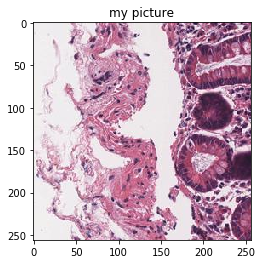

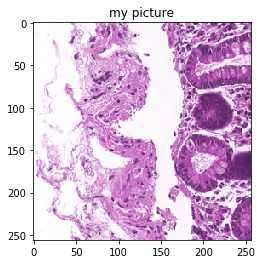

130378_6730_001_900_4700_0 Saved! Count: 30000  
 /scratch/as3ek/data_segments/data_balanced_duplicate_sample/train/EE/130378_6730_001_900_4700_0.jpg
30001 130373_6725_001_1500_4200_0
30002 130378_6730_002_1494_2158_0
30003 85_2800_1200_0
30004 50_3320_7636_0
30005 29_166_2822_0
30006 130378_6730_002_2300_4600_0
30007 130379_6731_002_1332_2997_0
30008 130378_6730_001_2375_4125_0
30009 130378_6730_001_333_666_0
30010 29_1494_2490_0
30011 130372_6724_001_600_12400_0
30012 130377_6729_001_1988_5822_0
30013 130369_6721_001_7125_14500_0
30014 130378_6730_001_111_1443_0
30015 108_5810_9960_0
30016 73_6142_6142_0
30017 130369_6721_001_4100_14100_0
30018 130372_6724_001_2997_3108_0
30019 130378_6730_001_1250_1000_0
30020 130378_6730_001_1625_3500_0
30021 130380_6726_001_1443_999_0
30022 59_5146_498_0
30023 130369_6721_001_9500_9375_0
30024 130372_6724_001_3900_800_0
30025 130372_6724_001_3108_9879_0
30026 130378_6730_002_1375_5875_0
30027 130370_6722_001_1332_10989_0
30028 130378_6730_001_1100

30285 59_8964_498_0
30286 111_4482_7968_0
30287 130373_6725_002_0_3408_0
30288 130379_6731_001_300_7300_0
30289 111_2490_5146_0
30290 58_4500_2500_0
30291 84_6200_4400_0
30292 130378_6730_001_1875_7875_0
30293 130373_6725_001_3885_1332_0
30294 130365_6716_001_2442_4107_0
30295 130377_6729_001_800_5000_0
30296 130369_6721_001_6806_14940_0
30297 42_5312_2158_0
30298 85_7636_3984_0
30299 130369_6721_001_7700_11100_0
30300 51_4000_3600_0
30301 58_7470_4814_0
30302 130370_6722_001_10934_2556_0
30303 77_5478_664_0
30304 130369_6721_001_11786_10366_0
30305 79_3200_5400_0
30306 130372_6724_001_284_11502_0
30307 130378_6730_001_2400_6900_0
30308 120_2000_5250_0
30309 50_1750_4500_0
30310 130382_6718_001_1420_1562_0
30311 120_4329_4995_0
30312 22_2324_2988_0
30313 130373_6725_002_710_3124_0
30314 130372_6724_001_4500_8000_0
30315 130380_6726_001_2700_900_0
30316 130369_6721_001_700_17600_0
30317 79_2158_4814_0
30318 11_4980_5478_0
30319 120_12284_1494_0
30320 73_2600_9000_0
30321 130379_6731_002

30581 130372_6724_001_568_12212_0
30582 22_3486_4316_0
30583 130373_6725_002_1494_4150_0
30584 130369_6721_001_7600_13600_0
30585 130373_6725_001_284_3692_0
30586 130382_6718_001_2442_2775_0
30587 79_3154_7470_0
30588 130369_6721_001_5644_11288_0
30589 120_6500_8500_0
30590 50_2500_1250_0
30591 130372_6724_001_500_11200_0
30592 130369_6721_001_375_18750_0
30593 84_3000_3000_0
30594 130379_6731_002_1100_5000_0
30595 87_2988_3154_0
30596 79_1494_3818_0
30597 130365_6716_001_1776_1443_0
30598 130370_6722_001_6000_13125_0
30599 130369_6721_001_444_18759_0
30600 87_2822_6142_0
30601 130382_6718_001_2442_1110_0
30602 130370_6722_001_13000_3700_0
30603 130373_6725_002_4662_1554_0
30604 130377_6729_001_5400_900_0
30605 130369_6721_001_8547_10989_0
30606 130369_6721_001_7625_12500_0
30607 35_4500_1250_0
30608 130372_6724_001_5500_3250_0
30609 59_6993_3996_0
30610 120_6308_4980_0
30611 130372_6724_001_2500_4500_0
30612 130369_6721_001_8214_11766_0
30613 108_5478_7968_0
30614 111_4648_4316_0
3061

30870 87_3320_1826_0
30871 85_8632_3652_0
30872 130369_6721_001_9125_10500_0
30873 130377_6729_001_200_5900_0
30874 130373_6725_001_4970_568_0
30875 23_11620_5810_0
30876 77_6000_7750_0
30877 130370_6722_001_1400_11200_0
30878 130376_6728_001_4625_750_0
30879 130370_6722_001_1328_11786_0
30880 130382_6718_001_2500_2300_0
30881 130379_6731_002_2400_2900_0
30882 130379_6731_002_3108_2664_0
30883 130369_6721_001_6660_14763_0
30884 130377_6729_001_4551_1554_0
30885 58_1998_1665_0
30886 85_1800_5200_0
30887 130376_6728_001_4625_1500_0
30888 130369_6721_001_10750_9375_0
30889 130373_6725_002_2600_2000_0
30890 85_3818_2988_0
30891 73_5000_3800_0
30892 108_10000_7600_0
30893 42_1162_1826_0
30894 130373_6725_002_1900_3400_0
30895 79_3200_1800_0
30896 59_4482_996_0
30897 130379_6731_001_1200_3300_0
30898 108_5312_6142_0
30899 23_9960_7304_0
30900 130365_6716_001_1332_666_0
30901 130379_6731_001_3800_1700_0
30902 120_9296_5478_0
30903 130379_6731_001_6674_994_0
30904 130378_6730_002_426_2272_0
30

31164 130378_6730_001_142_1704_0
31165 130377_6729_001_3875_3375_0
31166 111_3320_664_0
31167 23_2750_8000_0
31168 87_2158_7636_0
31169 120_2988_5644_0
31170 130373_6725_002_1800_3300_0
31171 111_2656_6972_0
31172 23_13114_5146_0
31173 130373_6725_001_1750_3500_0
31174 130372_6724_001_1887_10212_0
31175 111_3200_2800_0
31176 59_3320_3818_0
31177 130370_6722_001_9462_2656_0
31178 130365_6716_001_4300_5300_0
31179 130379_6731_001_2840_5822_0
31180 130370_6722_001_250_11250_0
31181 23_11600_6000_0
31182 84_4150_4648_0
31183 130382_6718_001_1846_2414_0
31184 108_6600_3600_0
31185 22_3320_4316_0
31186 58_6972_4980_0
31187 58_7470_4980_0
31188 130376_6728_001_500_700_0
31189 50_1665_4995_0
31190 50_4250_3500_0
31191 11_5000_2750_0
31192 130369_6721_001_4800_13100_0
31193 130379_6731_001_800_5900_0
31194 11_2988_2656_0
31195 130372_6724_001_1500_8900_0
31196 130379_6731_002_5500_2250_0
31197 130379_6731_001_2300_5000_0
31198 108_6800_3200_0
31199 42_4500_2000_0
31200 29_4200_1000_0
31201 50_7

31453 130373_6725_002_2656_3652_0
31454 58_996_664_0
31455 130369_6721_001_7375_13750_0
31456 120_7800_5800_0
31457 130377_6729_001_2331_4995_0
31458 23_3652_9130_0
31459 130370_6722_001_6771_12765_0
31460 42_2250_3000_0
31461 51_4800_3800_0
31462 77_7400_6200_0
31463 130379_6731_001_6300_1200_0
31464 130373_6725_002_600_3500_0
31465 130378_6730_002_1500_4750_0
31466 111_3818_3818_0
31467 130378_6730_001_1162_4482_0
31468 85_3154_2988_0
31469 77_3818_6806_0
31470 120_6500_9000_0
31471 108_5810_3652_0
31472 120_11500_2750_0
31473 130379_6731_001_3125_4000_0
31474 120_8632_5976_0
31475 130377_6729_001_3700_3500_0
31476 84_2656_1992_0
31477 130369_6721_001_8466_11786_0
31478 120_3663_4662_0
31479 77_1750_6000_0
31480 73_6972_166_0
31481 130378_6730_002_2158_5146_0
31482 130379_6731_002_6142_830_0
31483 130373_6725_002_1000_2900_0
31484 111_5750_4750_0
31485 130376_6728_001_100_900_0
31486 11_4980_3652_0
31487 130370_6722_001_8750_11625_0
31488 130370_6722_001_4625_13375_0
31489 120_10790_

31749 130378_6730_002_777_2775_0
31750 130369_6721_001_5328_14763_0
31751 130376_6728_001_900_1300_0
31752 79_2750_7250_0
31753 130370_6722_001_12700_2700_0
31754 51_5146_996_0
31755 108_6200_4000_0
31756 130380_6726_001_2500_1200_0
31757 35_3400_2600_0
31758 130379_6731_001_2400_4100_0
31759 108_4814_3818_0
31760 130372_6724_001_3408_994_0
31761 130382_6718_001_2556_142_0
31762 130379_6731_002_2158_4316_0
31763 77_4250_1250_0
31764 73_5800_4000_0
31765 11_5200_3000_0
31766 79_6800_4200_0
31767 22_5200_2600_0
31768 108_2158_7470_0
31769 23_5976_11952_0
31770 130373_6725_001_2900_1600_0
31771 130380_6726_001_1125_500_0
31772 85_3200_6200_0
31773 50_6660_2664_0
31774 130370_6722_001_1998_12432_0
31775 130382_6718_001_830_2988_0
31776 130369_6721_001_11454_10126_0
31777 23_5312_1328_0
31778 130369_6721_001_4150_830_0
31779 130378_6730_002_2125_2125_0
31780 84_1494_5478_0
31781 59_2822_2490_0
31782 87_2500_2000_0
31783 73_4250_2500_0
31784 111_750_7000_0
31785 35_4995_5661_0
31786 130379_6

In [ ]:
count = 0
for key in images_by_folder.keys():
    for value in list(images_by_folder[key]):
        count += 1
        if count < 3637:
            continue
#         print(key)
#         print(value)
        print (str(count) + ' ' + str(value))
        source_img_path = str(key) + str(value) + '.jpg'
        dest_img_path = str(path_change_map[key]) + str(value) + '.jpg'
#         print(source_img_path)
        img = staintools.read_image(source_img_path)
        if (np.mean(img) > 240) or (np.mean(img) < 10):
            continue
        # standardize brightness
        img_standard = standardizer.transform(img)
        # transform the images
        img_normalized = stain_normalizer.transform(img_standard)
        # write image to path

#             plt.imshow(img)
#             plt.title('my picture')
#             plt.show()
#             plt.imshow(img_normalized)
#             plt.title('my picture')
#             plt.show()

        if (count % 10000 == 0):
            plt.imshow(img)
            plt.title('my picture')
            plt.show()
            plt.imshow(img_normalized)
            plt.title('my picture')
            plt.show()
            print(value + ' Saved! Count: ' + str(count) + '  \n ' + str(dest_img_path))
        cv2.imwrite(os.path.normpath(dest_img_path), img_normalized)

In [ ]:
path_change_map

In [ ]:
list(images_by_folder.keys())[0]

In [21]:
images_by_folder[list(images_by_folder.keys())[0]][3637]

'130379_6731_002_4773_2442_0'

In [28]:
value = list(images_by_folder[list(images_by_folder.keys())[0]])[3637]

In [29]:
len(list(images_by_folder[list(images_by_folder.keys())[0]])[3637:])

131184

In [30]:
source_img_path = str(key) + str(value) + '.jpg'

In [31]:
source_img_path

'../data_segments/data_balanced_duplicate_sample/train/EE/130379_6731_002_4773_2442_0.jpg'

In [32]:
img = staintools.read_image(source_img_path)

In [33]:
np.mean(img)

242.99700927734375

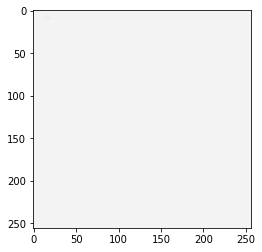

In [34]:
plt.imshow(img)